# 중동 국가 이커머스 데이터 분석

### 목표
- 현황파악 후 어떤 Action Plan으로 매출 증대를 이끌 수 있을 것인가?
- 어떤 추천 시스템을 적용해야 할까?

## 1. 데이터셋 불러오기

현 진행 단계는 csv파일을 로컬에서 불러와 진행함.

### 라이브러리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib as mpl
from datetime import datetime
from datetime import timedelta

# Windows
mpl.rc("font", family='Malgun Gothic')

warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format='retina'

### 데이터 불러오기

In [2]:
csv = 'C:/Users/JEON_SANGEON/codestates/data/2019-Oct.csv'
origin_df = pd.read_csv(csv)

In [3]:
origin_df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...
42448759,2019-10-31 23:59:58 UTC,view,2300275,2053013560530830019,electronics.camera.video,gopro,527.40,537931532,22c57267-da98-4f28-9a9c-18bb5b385193
42448760,2019-10-31 23:59:58 UTC,view,10800172,2053013554994348409,NaN,redmond,61.75,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8
42448761,2019-10-31 23:59:58 UTC,view,5701038,2053013553970938175,auto.accessories.player,kenwood,128.70,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd
42448762,2019-10-31 23:59:59 UTC,view,21407424,2053013561579406073,electronics.clocks,tissot,689.85,513118352,4c14bf2a-2820-4504-929d-046356a5a204


In [4]:
# 주요 컬럼 확인

origin_df.columns

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

In [6]:
# 컬럼별 Dtype 확인

origin_df.info()

# event_time - object로 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ GB


In [7]:
# 결측치 조회
origin_df.isnull().sum()

event_time              0
event_type              0
product_id              0
category_id             0
category_code    13515609
brand             6117080
price                   0
user_id                 0
user_session            2
dtype: int64

### 컬럼별 결측치 확인


 category_code  |  13,515,609\
 brand          |   6,117,080\
 user_session   |           2


In [17]:
# 날짜컬럼 변경 및 원본 소실 방지를 위핸 copy 진행

origin_df['event_time'] = pd.to_datetime(origin_df['event_time'], utc=True)
origin_df['event_time'] = origin_df['event_time'].dt.tz_convert('Asia/Dubai')

df = origin_df.copy()
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 04:00:00+04:00,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 04:00:00+04:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 04:00:01+04:00,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 04:00:01+04:00,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 04:00:04+04:00,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...
42448759,2019-11-01 03:59:58+04:00,view,2300275,2053013560530830019,electronics.camera.video,gopro,527.40,537931532,22c57267-da98-4f28-9a9c-18bb5b385193
42448760,2019-11-01 03:59:58+04:00,view,10800172,2053013554994348409,NaN,redmond,61.75,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8
42448761,2019-11-01 03:59:58+04:00,view,5701038,2053013553970938175,auto.accessories.player,kenwood,128.70,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd
42448762,2019-11-01 03:59:59+04:00,view,21407424,2053013561579406073,electronics.clocks,tissot,689.85,513118352,4c14bf2a-2820-4504-929d-046356a5a204


# 결측치 처리

In [18]:
# 원활한 진행을 위해 category_code부터 결측 데이터를 우선적으로 확인

df_category = df[df['category_code'].isnull()]
df_category

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 04:00:00+04:00,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
6,2019-10-01 04:00:08+04:00,view,17300353,2053013553853497655,NaN,creed,380.96,555447699,4fe811e9-91de-46da-90c3-bbd87ed3a65d
7,2019-10-01 04:00:08+04:00,view,31500053,2053013558031024687,NaN,luminarc,41.16,550978835,6280d577-25c8-4147-99a7-abc6048498d6
13,2019-10-01 04:00:15+04:00,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
15,2019-10-01 04:00:17+04:00,view,23100006,2053013561638126333,NaN,NaN,357.79,513642368,17566c27-0a8f-4506-9f30-c6a2ccbf583b
...,...,...,...,...,...,...,...,...,...
42448750,2019-11-01 03:59:55+04:00,view,42200036,2095518917320508073,NaN,NaN,17.50,515474976,222c370b-0fac-4287-982b-e340f5eaf3a1
42448755,2019-11-01 03:59:58+04:00,view,12800151,2053013552788144369,NaN,sony,8.49,544578298,fb46b2fb-493b-477c-8d18-ea1c24c04020
42448756,2019-11-01 03:59:58+04:00,view,5100816,2053013553375346967,NaN,xiaomi,29.58,543653226,ab310b47-1eb2-45f8-8e5b-21ab2010925a
42448760,2019-11-01 03:59:58+04:00,view,10800172,2053013554994348409,NaN,redmond,61.75,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8


In [19]:
df_category['category_id'].value_counts().head()

2053013553559896355    1888744
2053013563651392361     787191
2053013556168753601     694553
2053013563693335403     491197
2053013557024391671     466987
Name: category_id, dtype: int64

In [10]:
df_category['product_id'].value_counts().head()

5100816     189460
12703015     58330
22700084     50448
22700129     49847
12703498     40143
Name: product_id, dtype: int64

In [12]:
# 결측값이 많은 category_id 기준으로 product_id 정렬

origin_df.loc[df['category_id']==2053013553559896355]['product_id'].value_counts().head()

12703015    58330
12703498    40143
12703494    35356
12703415    23009
12709380    15817
Name: product_id, dtype: int64

In [15]:
print(df.loc[df.product_id == 12703015].shape)
df.loc[df.product_id == 12703015].isnull().sum()

(58330, 9)


event_time           0
event_type           0
product_id           0
category_id          0
category_code    58330
brand                0
price                0
user_id              0
user_session         0
dtype: int64

다방면으로 조사해본 결과 상품 분류가 이뤄지지 않은 상품들은 NaN으로 처리된 것을 확인할 수 있었음.

최대한 많은 결측값을 살리기위해 결측값이 높은 카테고리를 기준으로 직접 조회를 진행함

In [20]:
# product_id 웹 검색을 활용하여 해당하는 카테고리를 확인함.
# 모든 데이터를 확인하기에는 시간이 오래 걸리기에 비율이 높은 30개를 우선적으로 탐색하여 진행함.

category_dict = {2053013553559896355 : 'auto.accessories.tire',
                2053013563651392361 : 'accessories.jewelry',
                2053013556168753601 : 'construction.tool.kit',
                2053013563693335403 : 'accessories.jewelry',
                2053013557024391671 : 'furniture.bedroom.set',
                2053013563970159485 : 'appliances.kitchen.cooker',
                2053013563173241677 : 'beauty.technique.dryer',
                2053013553853497655 : 'beauty.perfumery',
                2053013553375346967 : 'electronics.clock',
                2053013563584283495 : 'accessories.jewelry',
                2053013553526341921 : 'auto.accessories.disc',
                2053013559733912211 : 'furniture.living_room',
                2053013564918072245 : 'home.textiles.carpet',
                2053013561218695907 : 'electronics.video.tv',
                2053013552385491165 : 'appliances.environment.air_conditioning',
                2062461754293617058 : 'auto.accessories.car_seat',
                2053013552259662037 : 'appliances.environment.boiler',
                2053013563550729061 : 'accessories.jewelry',
                2053013558525952589 : 'electronics.smartphone.phone_accessories',
                2053013558031024687 : 'furniture.kitchen.crockery',
                2053013553484398879 : 'auto.accessories.battery',
                2053013554994348409 : 'appliances.kitchen.multibaker',
                2053013555355058573 : 'appliances.kitchen.multicooker',
                2053013557166998015 : 'furniture.bedroom.mattress',
                2085718636156158307 : 'furniture.bedroom.pillow',
                2053013558190408249 : 'furniture.kitchen.pan',
                2053013555287949705 : 'appliances.kitchen.meat_grinder',
                2144356630513320518 : 'apparel.coat',
                2053013560144954031 : 'appliances.kitchen.washer',
                2053013554524586339 : 'electronics.audio.music_center'
                }

In [21]:
# 위의 카테고리 dict를 활용하여 df에 NaN값 채우기 진행
def fill_cat(df, col="category_code"):
    # category_code 열의 None값 nones에 선언
    nones = df[col].isnull()
    for cat_id, cat_code in category_dict.items():
        # category_id 열 값 중 cat_id와 동일한 값들을 찾는 조건 설정
        cat_cond = (df["category_id"] == cat_id)
        # category_code열의 none값들 중에 cat_cond 조건과 일치하는 것을 cat_code로 선언
        df.loc[nones & cat_cond, col] = cat_code

    return df

fill_cat(df, col="category_code")

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 04:00:00+04:00,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 04:00:00+04:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 04:00:01+04:00,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 04:00:01+04:00,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 04:00:04+04:00,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...
42448759,2019-11-01 03:59:58+04:00,view,2300275,2053013560530830019,electronics.camera.video,gopro,527.40,537931532,22c57267-da98-4f28-9a9c-18bb5b385193
42448760,2019-11-01 03:59:58+04:00,view,10800172,2053013554994348409,appliances.kitchen.multibaker,redmond,61.75,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8
42448761,2019-11-01 03:59:58+04:00,view,5701038,2053013553970938175,auto.accessories.player,kenwood,128.70,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd
42448762,2019-11-01 03:59:59+04:00,view,21407424,2053013561579406073,electronics.clocks,tissot,689.85,513118352,4c14bf2a-2820-4504-929d-046356a5a204


In [22]:
df.isnull().sum()

# 기존 처리전 결측데이터보다 확연하게 줄어든 것을 확인할 수 있음.
# category_code    13,515,609 -> 4,707,919 약 8,807,690개의 데이터 보존
# brand             6,117,080

event_time             0
event_type             0
product_id             0
category_id            0
category_code    4707919
brand            6117080
price                  0
user_id                0
user_session           2
dtype: int64

In [23]:
# 브랜드는 NaN인데 category_id가 동일한 product_id 조회시 브랜드를 발견함. 
# brand를 최대한 살리는 함수

brand_dict = {"accessories.jewelry" : "lucente",
              "furniture.bedroom.set" : "horizon",
              "furniture.living_room.cabinet" : "stand_furniture",
              "electronics.clocks" : "q&q",
              "appliances.kitchen.refrigerators" : "biryusa"}

def fill_br(df, col="brand"):
    # brand 열의 None값 nones에 선언
    nones = df[col].isnull()
    for cat_code, mode in brand_dict.items():
        # category_code 열 값 중 cat_code와 동일한 값들을 찾는 조건 설정
        cat_cond = (df["category_code"] == cat_code)
        # brand열의 none값들 중에 cat_cond 조건과 일치하는 것을 mode로 선언
        df.loc[nones & cat_cond, col] = mode

    return df

fill_br(df, col="brand")

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 04:00:00+04:00,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 04:00:00+04:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 04:00:01+04:00,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 04:00:01+04:00,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 04:00:04+04:00,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...
42448759,2019-11-01 03:59:58+04:00,view,2300275,2053013560530830019,electronics.camera.video,gopro,527.40,537931532,22c57267-da98-4f28-9a9c-18bb5b385193
42448760,2019-11-01 03:59:58+04:00,view,10800172,2053013554994348409,appliances.kitchen.multibaker,redmond,61.75,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8
42448761,2019-11-01 03:59:58+04:00,view,5701038,2053013553970938175,auto.accessories.player,kenwood,128.70,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd
42448762,2019-11-01 03:59:59+04:00,view,21407424,2053013561579406073,electronics.clocks,tissot,689.85,513118352,4c14bf2a-2820-4504-929d-046356a5a204


In [24]:
df.isnull().sum()

# 기존 처리전 결측데이터보다 확연하게 줄어든 것을 확인할 수 있음.
# category_code    13,515,609 -> 4,707,919 -> 8,807,690개의 데이터 보존
# brand             6,117,080 -> 4,340,951 -> 1,776,129개의 데이터 보존

event_time             0
event_type             0
product_id             0
category_id            0
category_code    4707919
brand            4340951
price                  0
user_id                0
user_session           2
dtype: int64

### 남은 결측치 처리

In [25]:
# 브랜드 (O), 카테고리 (X)
# 브랜드는 있으나 카테고리 값이 없을 경우 no_cat으로 지정

df.loc[df.category_code.isnull()&df.brand.notnull(),'category_code'] = 'no_cat'

In [26]:
# 브랜드 (X), 카테고리 (O)

df.loc[df.category_code.notnull()&df.brand.isnull(),'brand'] = 'no_brand'

In [27]:
df.isnull().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    1521087
brand            1521087
price                  0
user_id                0
user_session           2
dtype: int64

In [28]:
# 2개 남은 user_session 확인

df[df['user_session'].isnull()]

# 두가지 모두 cart이므로 최대한 살려서 진행하기로 함.

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
7157243,2019-10-06 18:26:10+04:00,cart,1801723,2053013554415534427,electronics.video.tv,tcl,135.65,557388939,NaN
33940774,2019-10-25 14:36:14+04:00,cart,1004767,2053013555631882655,electronics.smartphone,samsung,246.52,549825742,NaN


In [29]:
# 유저id, product_id 기준으로 조회 

df.loc[(df['user_id']==557388939) & (df['product_id']==1801723)]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
7156089,2019-10-06 18:25:18+04:00,view,1801723,2053013554415534427,electronics.video.tv,tcl,135.65,557388939,9c11ac2d-5c56-4994-87e4-ea077ab0ab45
7157243,2019-10-06 18:26:10+04:00,cart,1801723,2053013554415534427,electronics.video.tv,tcl,135.65,557388939,NaN
8123931,2019-10-07 14:15:39+04:00,view,1801723,2053013554415534427,electronics.video.tv,tcl,135.65,557388939,083ceaa9-32d0-4e45-a67c-40bfaba0a275


In [30]:
df.loc[(df['user_id']==549825742) & (df['product_id']==1004767)]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
33820866,2019-10-25 13:01:50+04:00,view,1004767,2053013555631882655,electronics.smartphone,samsung,246.52,549825742,aac8b299-4355-4c25-bbfe-c0369f19a3ce
33834071,2019-10-25 13:12:12+04:00,cart,1004767,2053013555631882655,electronics.smartphone,samsung,246.52,549825742,aac8b299-4355-4c25-bbfe-c0369f19a3ce
33834776,2019-10-25 13:12:42+04:00,cart,1004767,2053013555631882655,electronics.smartphone,samsung,246.52,549825742,aac8b299-4355-4c25-bbfe-c0369f19a3ce
33835027,2019-10-25 13:12:52+04:00,cart,1004767,2053013555631882655,electronics.smartphone,samsung,246.52,549825742,aac8b299-4355-4c25-bbfe-c0369f19a3ce
33840806,2019-10-25 13:17:05+04:00,cart,1004767,2053013555631882655,electronics.smartphone,samsung,246.52,549825742,aac8b299-4355-4c25-bbfe-c0369f19a3ce
33940774,2019-10-25 14:36:14+04:00,cart,1004767,2053013555631882655,electronics.smartphone,samsung,246.52,549825742,NaN


In [31]:
# 유사하거나 일치하는 user_session으로 통일함.

df.loc[(df['user_id']==557388939)&df.user_session.isnull(),'user_session'] = '9c11ac2d-5c56-4994-87e4-ea077ab0ab45'
df.loc[(df['user_id']==549825742)&df.user_session.isnull(),'user_session'] = 'aac8b299-4355-4c25-bbfe-c0369f19a3ce'

남은 결측치는 missing으로 처리 진행

In [32]:
df = df.fillna('missing')
df.isnull().sum()

event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
dtype: int64

### 결측 처리 후 csv화 진행함.

In [2]:
csv_EDA = 'C:/Users/JEON_SANGEON/codestates/data/cp2_EDA.csv'
df_EDA= pd.read_csv(csv_EDA)

# csv 불러와서 날짜컬럼 재설정
df_EDA['event_time'] = pd.to_datetime(df_EDA['event_time'], utc=True)
df_EDA['event_time'] = df_EDA['event_time'].dt.tz_convert('Asia/Dubai')

# 불필요 컬럼 제거
del df_EDA['Unnamed: 0']

In [3]:
df = df_EDA.copy()

# 결측치 처리 후 데이터 분석

In [35]:
# event_type 비율 확인
print(df['event_type'].value_counts())

print(df['event_type'].value_counts(normalize=True))

view        40779399
cart          926516
purchase      742849
Name: event_type, dtype: int64
view        0.960673
cart        0.021827
purchase    0.017500
Name: event_type, dtype: float64


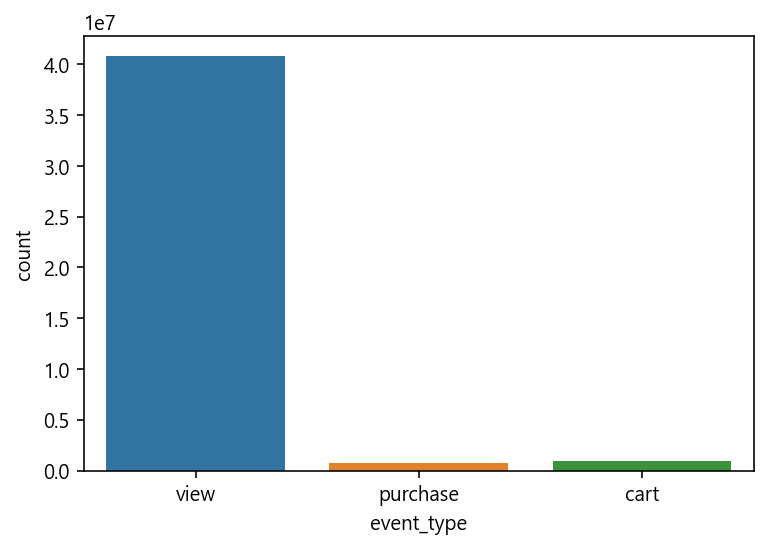

In [36]:
# event_type 비율 시각화
sns.countplot(x=df['event_type']);

# view, cart, purchase 요일별 비율 시각화 진행

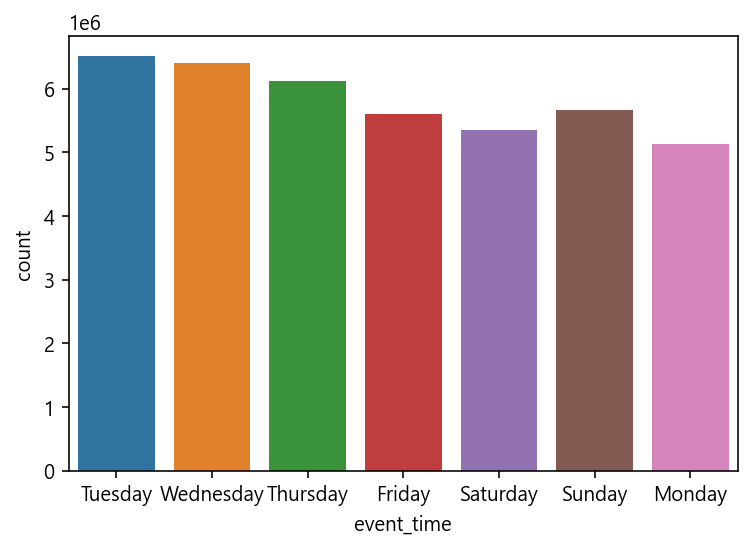

In [20]:
sns.countplot(x=df.loc[df['event_type'] == 'view']['event_time'].dt.day_name());

# 화, 수, 목

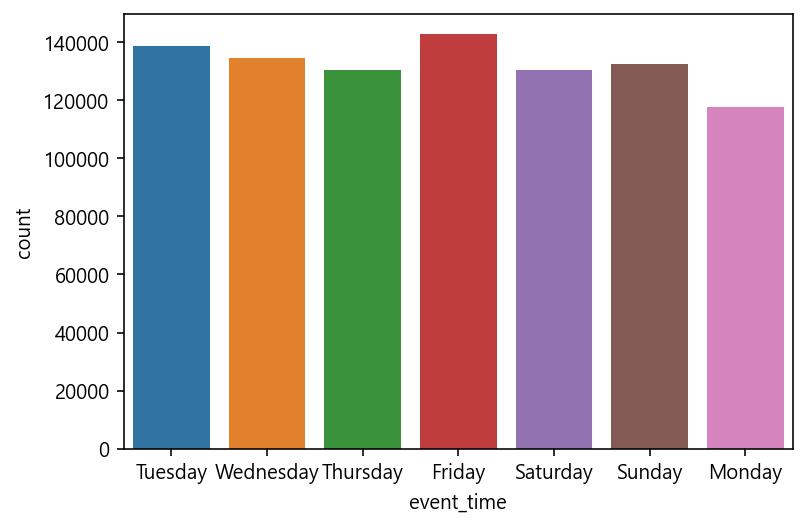

In [21]:
sns.countplot(x=df.loc[df['event_type'] == 'cart']['event_time'].dt.day_name());

# 금, 목, 수

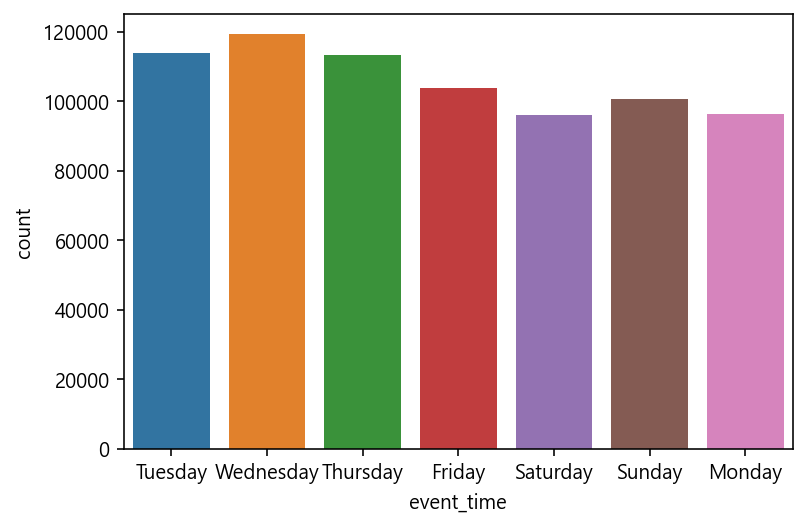

In [22]:
sns.countplot(x=df.loc[df['event_type'] == 'purchase']['event_time'].dt.day_name());

# 수, 화, 목

**view** - 화,수,목\
**cart** - 금,화,수\
**purchase** - 수,화,목

### 시간대별 시각화

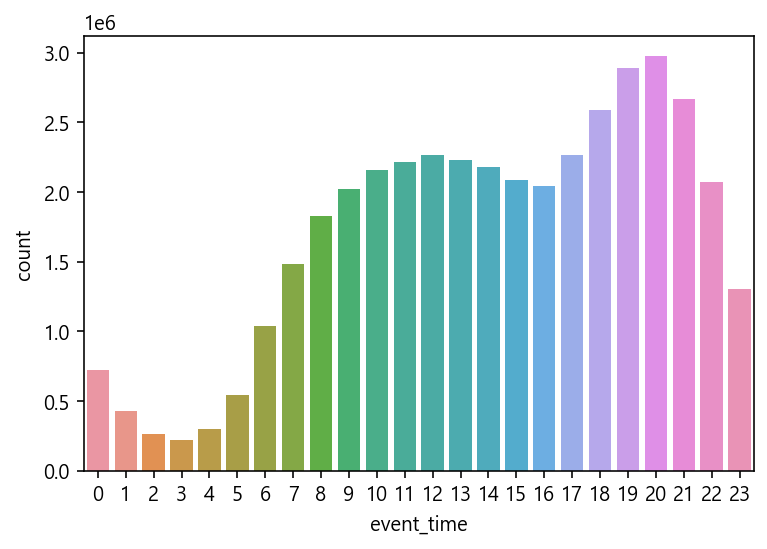

In [23]:
sns.countplot(x=df.loc[df['event_type'] == 'view']['event_time'].dt.hour);

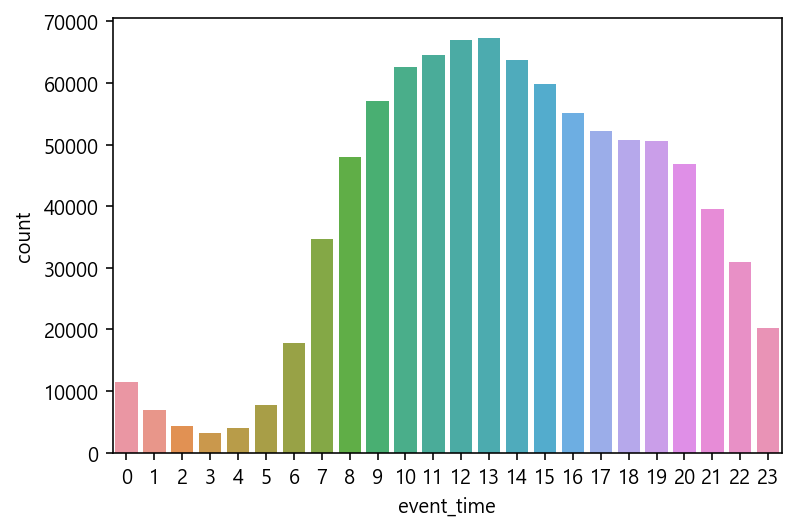

In [24]:
sns.countplot(x=df.loc[df['event_type'] == 'cart']['event_time'].dt.hour);

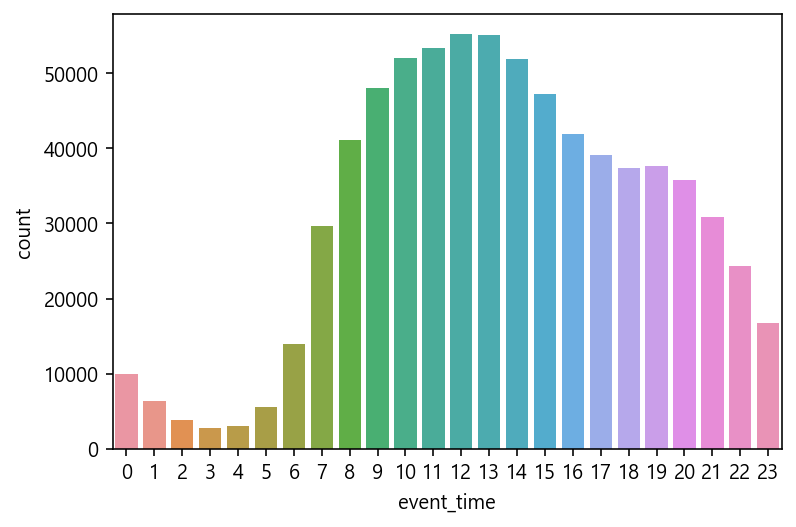

In [25]:
sns.countplot(x=df.loc[df['event_type'] == 'purchase']['event_time'].dt.hour);

In [8]:
session_first = df.groupby(['user_session','event_type'])['event_time'].agg(np.min)
session_first = pd.DataFrame(session_first).reset_index()
session_first

,user_session,event_type,event_time
0,00000042-3e3f-42f9-810d-f3d264139c50,view,2019-10-18 14:54:45+04:00
1,00000056-a206-40dd-b174-a072550fa38c,view,2019-10-31 10:23:12+04:00
2,00000083-8816-4d58-a9b8-f52f54186edc,cart,2019-10-06 15:33:54+04:00
3,00000083-8816-4d58-a9b8-f52f54186edc,purchase,2019-10-06 15:34:30+04:00
4,00000083-8816-4d58-a9b8-f52f54186edc,view,2019-10-06 15:24:45+04:00
...,...,...,...
10445306,fffff6b0-1ade-413d-b9b4-5fb0dd26aa34,view,2019-10-05 20:40:10+04:00
10445307,fffff79f-a682-4f63-ad94-8364fe3d648f,view,2019-10-18 10:42:56+04:00
10445308,fffff8d4-d31c-4066-a00b-2ace84d33640,view,2019-10-31 22:11:13+04:00
10445309,fffffa1b-a6f0-483a-8f4b-30db242889b6,view,2019-10-08 15:32:24+04:00


### 일별 세션 첫 접속

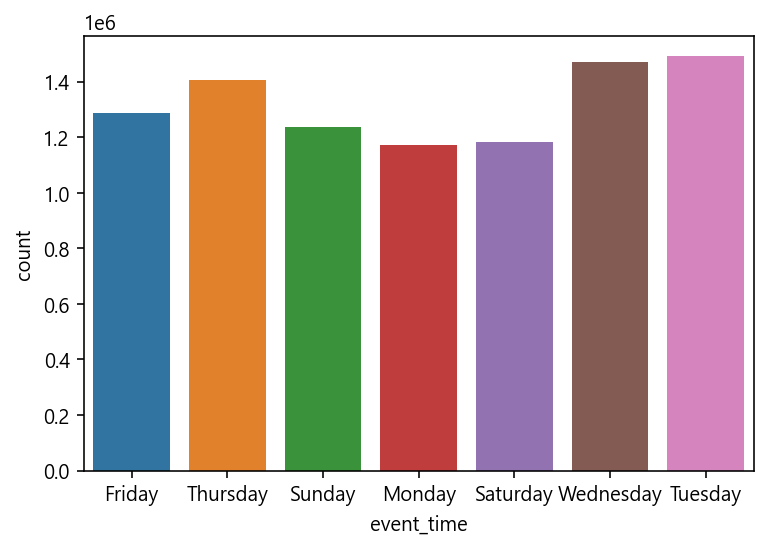

In [16]:
# view

sns.countplot(x=session_first.loc[session_first['event_type'] == 'view']['event_time'].dt.day_name());

# 화, 수, 목

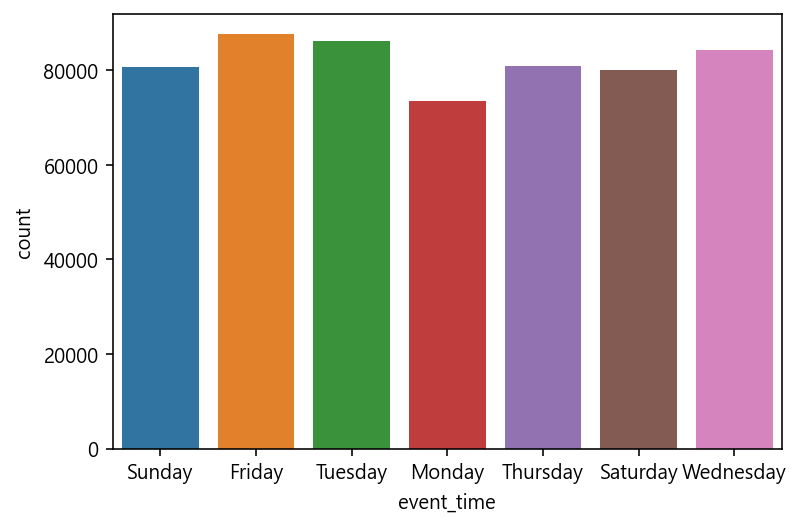

In [17]:
# cart

sns.countplot(x=session_first.loc[session_first['event_type'] == 'cart']['event_time'].dt.day_name());

# 금, 목, 수

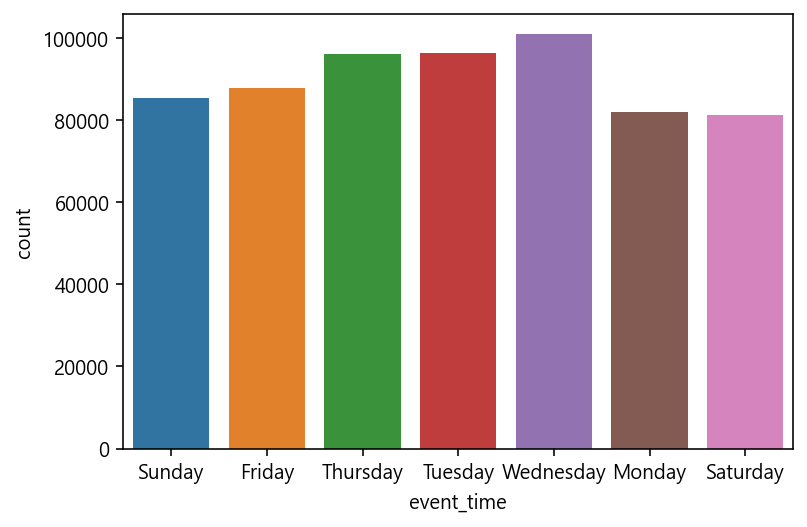

In [18]:
# purchase

sns.countplot(x=session_first.loc[session_first['event_type'] == 'purchase']['event_time'].dt.day_name());

# 수, 화, 목

### 시간별 세션 첫 접속

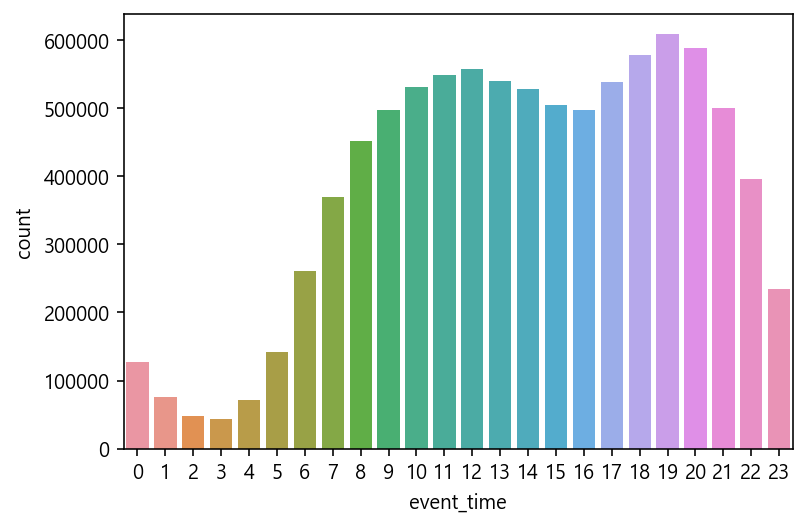

In [9]:
# view

sns.countplot(x=session_first.loc[session_first['event_type'] == 'view']['event_time'].dt.hour);

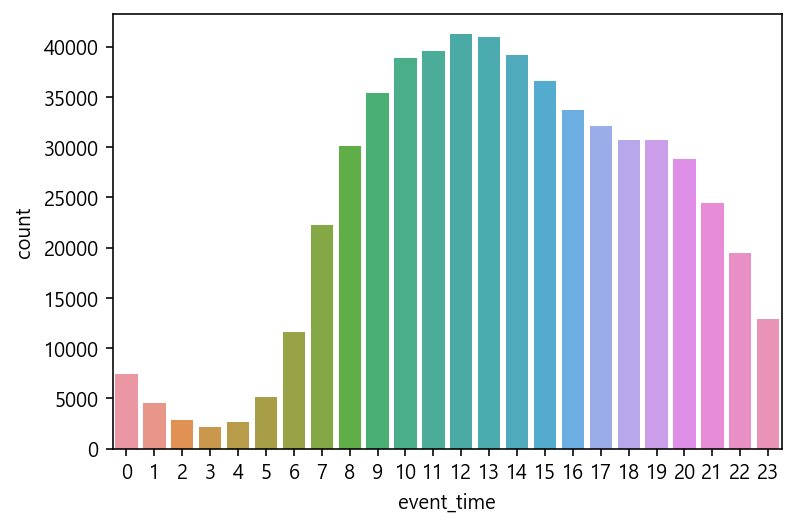

In [10]:
# cart

sns.countplot(x=session_first.loc[session_first['event_type'] == 'cart']['event_time'].dt.hour);

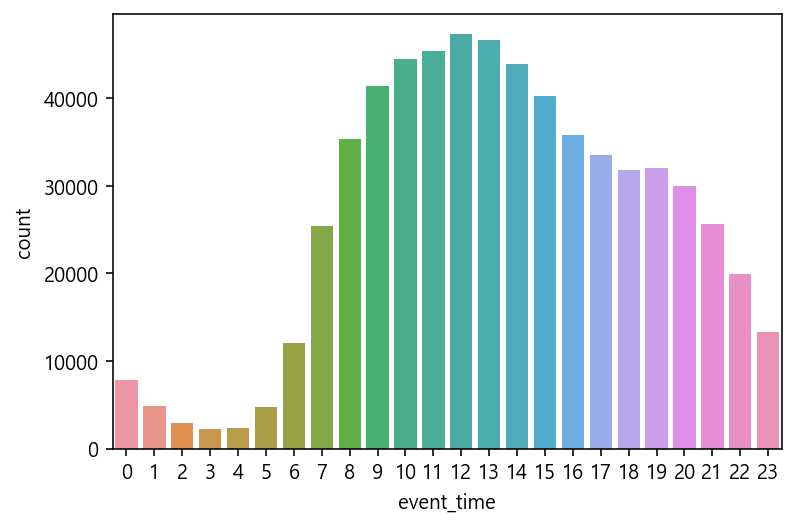

In [11]:
# purchase

sns.countplot(x=session_first.loc[session_first['event_type'] == 'purchase']['event_time'].dt.hour);

### 일,시간별 구매 히트맵

In [19]:
df_pur = df.loc[df['event_type']=='purchase']

df_pur['event_time'] = df_pur['event_time'].dt.to_period('H')
df_pur = df_pur.groupby('event_time').sum().reset_index()
df_pur['day'] = df_pur['event_time'].dt.day
df_pur['hour'] = df_pur['event_time'].dt.hour
df_pur = df_pur[['event_time','day','hour','price']].reset_index(drop=True)

df_pur

,event_time,day,hour,price
0,2019-10-01 04:00,1,4,2387.84
1,2019-10-01 06:00,1,6,85533.96
2,2019-10-01 07:00,1,7,252050.18
3,2019-10-01 08:00,1,8,316664.79
4,2019-10-01 09:00,1,9,404252.06
...,...,...,...,...
738,2019-10-31 23:00,31,23,170138.77
739,2019-11-01 00:00,1,0,82827.54
740,2019-11-01 01:00,1,1,78043.44
741,2019-11-01 02:00,1,2,43966.35


In [20]:
df_pivot = df_pur.pivot_table(values='price', index='day', columns='hour')
df_pivot

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
1,82827.54,78043.44,43966.35,37108.56,2387.84,NaN,85533.96,252050.18,316664.79,404252.06,...,473258.18,376913.34,394692.53,354671.13,320170.93,288232.30,320258.59,247675.46,220146.94,151567.08
2,89416.87,63449.11,33872.48,21636.38,31016.98,58747.04,112034.67,227935.19,319197.26,423417.17,...,492673.17,371083.21,369725.07,321423.97,305396.37,302244.68,268879.00,280256.85,168028.30,158346.41
3,78566.96,46003.24,30547.19,21243.54,28466.29,34685.60,115456.19,270882.73,326559.86,390375.69,...,425025.68,384549.33,313432.01,318456.33,283278.73,308106.33,265771.51,255334.92,272355.68,184429.70
4,107046.56,79584.90,43736.26,37791.06,35890.34,82875.50,147835.09,317819.69,404246.32,475853.29,...,659097.70,649371.77,591273.81,610389.88,482975.30,394358.02,381647.34,348797.95,228435.41,194160.19
5,103889.63,74750.04,40967.97,47195.84,38604.39,77085.13,125147.75,284128.57,438129.95,469740.47,...,515545.27,479608.55,419566.69,372014.21,346541.97,269901.71,300283.55,288346.58,241573.31,167858.88
6,138045.46,64024.06,57291.33,23992.83,25534.81,38990.55,98471.97,202902.83,346660.47,429249.56,...,505010.04,465560.07,425426.01,334136.48,343230.06,323340.14,317124.16,277347.36,220076.85,155295.20
7,68022.78,72754.44,42674.79,40015.38,33385.27,53579.39,118561.88,233807.49,347667.53,411686.49,...,451751.89,410541.53,354722.19,331878.99,288921.08,318254.62,278121.55,267852.30,200867.95,139790.20
8,110217.97,48669.17,29866.61,21930.09,20414.09,46823.86,134287.62,287418.21,371982.31,425982.15,...,451662.37,432151.79,384337.04,360855.22,338438.39,302417.43,317210.70,280143.50,233808.83,181146.56
9,83086.43,64277.31,37980.79,29391.54,20403.14,49269.98,127867.22,280300.45,379111.29,444028.27,...,515014.92,398838.51,395459.63,366044.08,323978.31,352208.50,295614.28,253282.99,199882.32,154205.00


In [22]:
df_pivot=df_pivot.divide(df_pivot[0],axis=0)
df_pivot

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.942240,0.530818,0.448022,0.028829,NaN,1.032675,3.043072,3.823182,4.880648,...,5.713778,4.550580,4.765233,4.282044,3.865513,3.479909,3.866571,2.990255,2.657895,1.829912
2,1.0,0.709588,0.378815,0.241972,0.346881,0.657002,1.252948,2.549130,3.569766,4.735316,...,5.509846,4.150036,4.134847,3.594668,3.415422,3.380175,3.007028,3.134273,1.879157,1.770878
3,1.0,0.585529,0.388805,0.270388,0.362319,0.441478,1.469526,3.447794,4.156453,4.968700,...,5.409725,4.894543,3.989362,4.053311,3.605571,3.921576,3.382739,3.249902,3.466542,2.347421
4,1.0,0.743461,0.408572,0.353034,0.335278,0.774200,1.381035,2.968986,3.776360,4.445293,...,6.157112,6.066255,5.523520,5.702097,4.511825,3.683986,3.565246,3.258376,2.133982,1.813792
5,1.0,0.719514,0.394341,0.454288,0.371590,0.741991,1.204622,2.734908,4.217264,4.521534,...,4.962432,4.616520,4.038581,3.580860,3.335674,2.597966,2.890409,2.775509,2.325288,1.615742
6,1.0,0.463790,0.415018,0.173804,0.184974,0.282447,0.713330,1.469826,2.511205,3.109480,...,3.658288,3.372513,3.081782,2.420481,2.486355,2.342273,2.297244,2.009102,1.594235,1.124957
7,1.0,1.069560,0.627360,0.588264,0.490795,0.787668,1.742973,3.437194,5.111046,6.052186,...,6.641185,6.035354,5.214756,4.878939,4.247417,4.678648,4.088653,3.937685,2.952951,2.055050
8,1.0,0.441572,0.270978,0.198970,0.185216,0.424830,1.218382,2.607725,3.374970,3.864907,...,4.097901,3.920883,3.487063,3.274014,3.070628,2.743812,2.878031,2.541723,2.121331,1.643530
9,1.0,0.773620,0.457124,0.353747,0.245565,0.592997,1.538966,3.373601,4.562854,5.344173,...,6.198544,4.800285,4.759618,4.405582,3.899293,4.239062,3.557913,3.048428,2.405716,1.855959


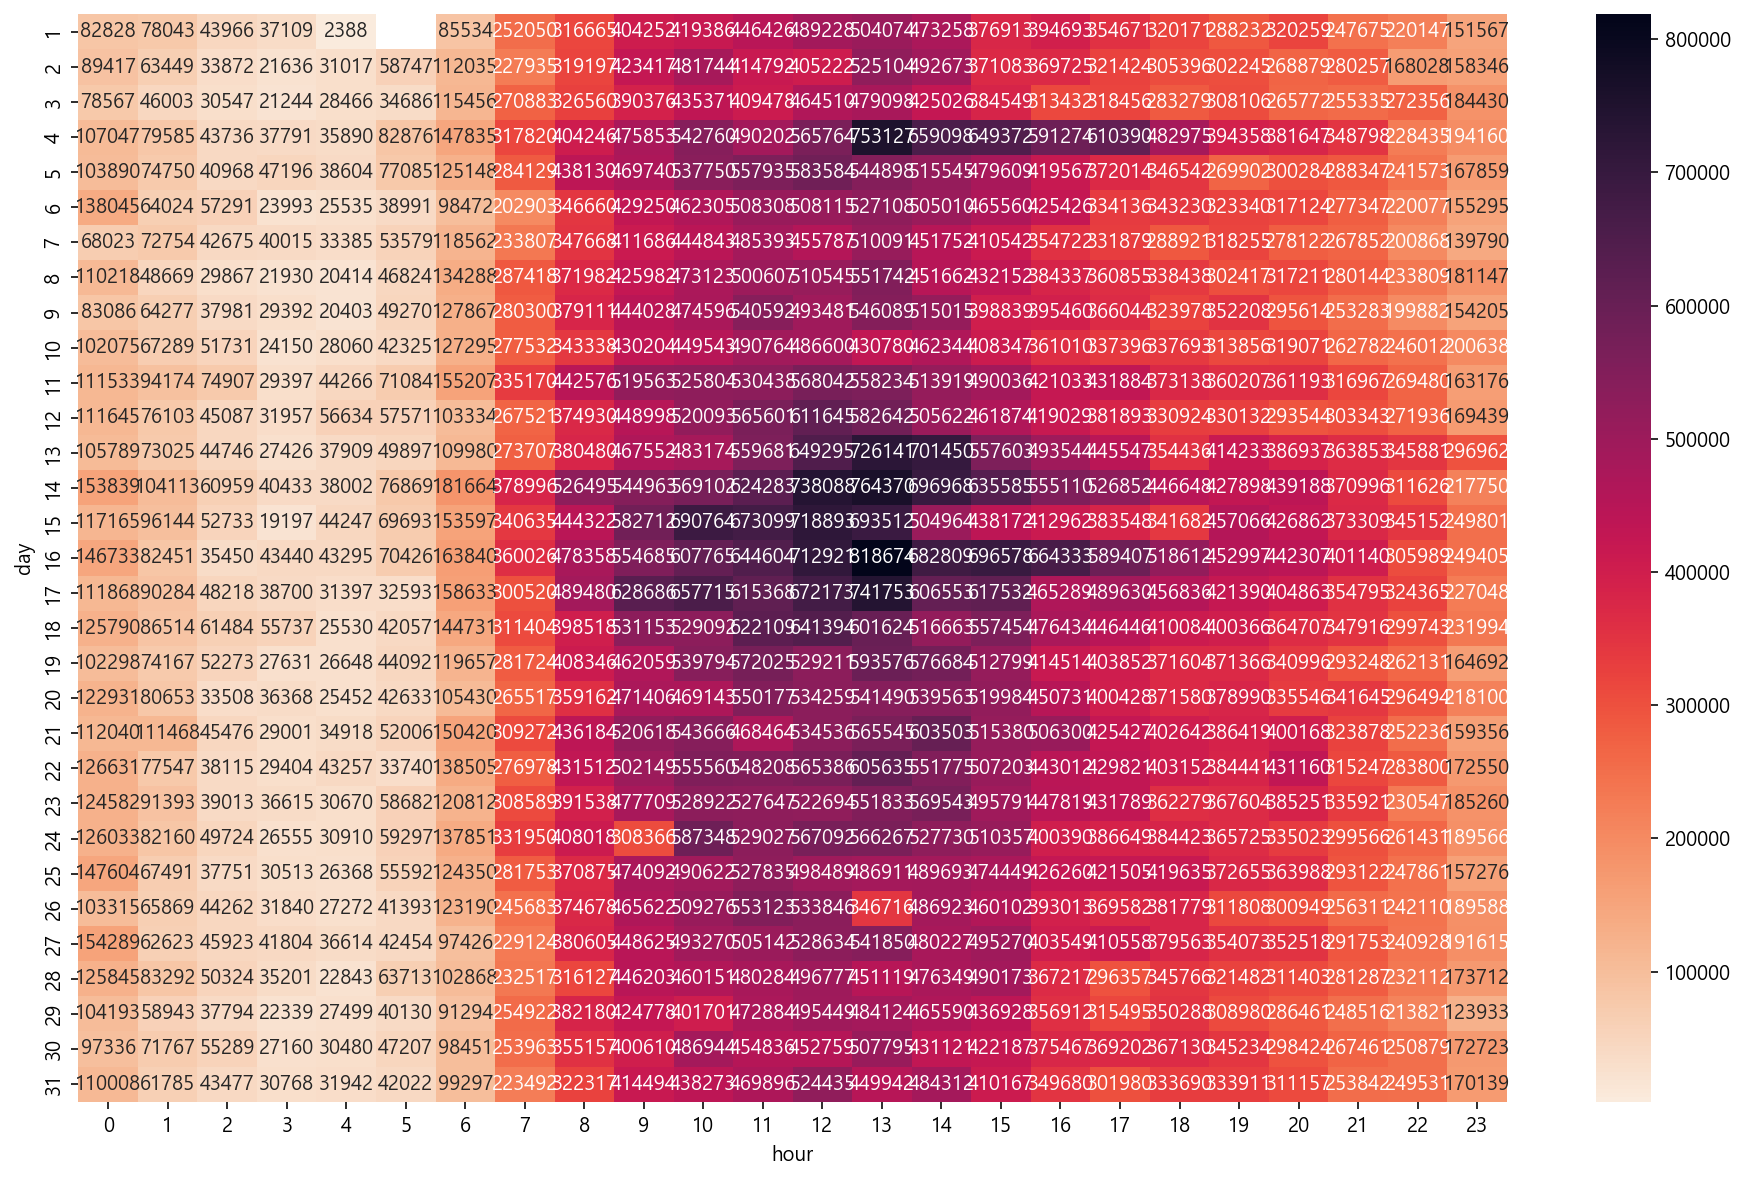

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


# 그래프 크기 설정
plt.figure(figsize=(16,10))

# 히트맵 그래프 그리기
sns.heatmap(df_pivot,annot = True, fmt='.0f',cmap='rocket_r')

# 그래프 표현
plt.show()

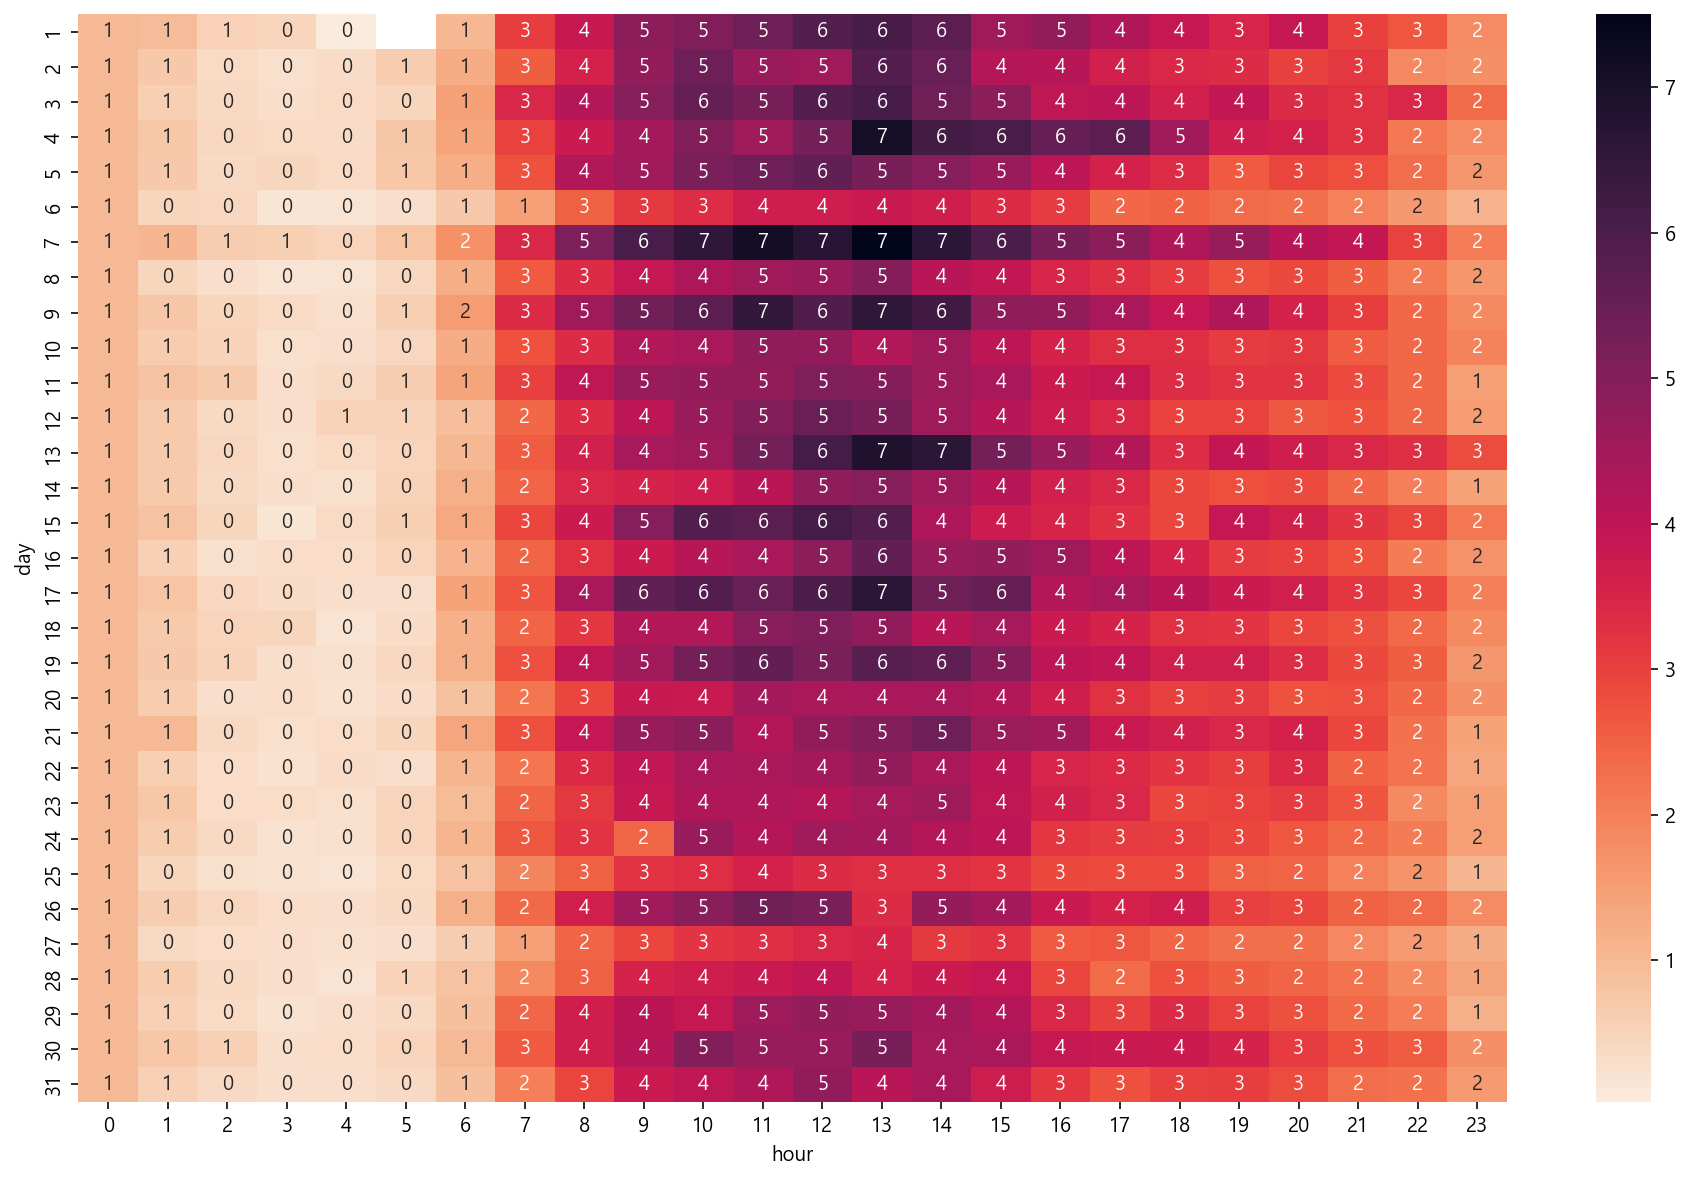

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns


# 그래프 크기 설정
plt.figure(figsize=(16,10))

# 히트맵 그래프 그리기
sns.heatmap(df_pivot,annot = True, fmt='.0f',cmap='rocket_r')

# 그래프 표현
plt.show()

### 요일,시간별 히트맵

In [24]:
df_pur_week = df.loc[df['event_type']=='purchase']

df_pur_week['event_time'] = df_pur_week['event_time'].dt.to_period('H')
df_pur_week = df_pur_week.groupby('event_time').sum().reset_index()
df_pur_week['day'] = df_pur_week['event_time'].dt.weekday
df_pur_week['hour'] = df_pur_week['event_time'].dt.hour
df_pur_week = df_pur_week[['event_time','day','hour','price']].reset_index(drop=True)

df_pur_week

,event_time,day,hour,price
0,2019-10-01 04:00,1,4,2387.84
1,2019-10-01 06:00,1,6,85533.96
2,2019-10-01 07:00,1,7,252050.18
3,2019-10-01 08:00,1,8,316664.79
4,2019-10-01 09:00,1,9,404252.06
...,...,...,...,...
738,2019-10-31 23:00,3,23,170138.77
739,2019-11-01 00:00,4,0,82827.54
740,2019-11-01 01:00,4,1,78043.44
741,2019-11-01 02:00,4,2,43966.35


In [25]:
df_pivot_week = df_pur_week.pivot_table(values='price', index='day', columns='hour')
df_pivot_week = df_pivot_week.round(0)

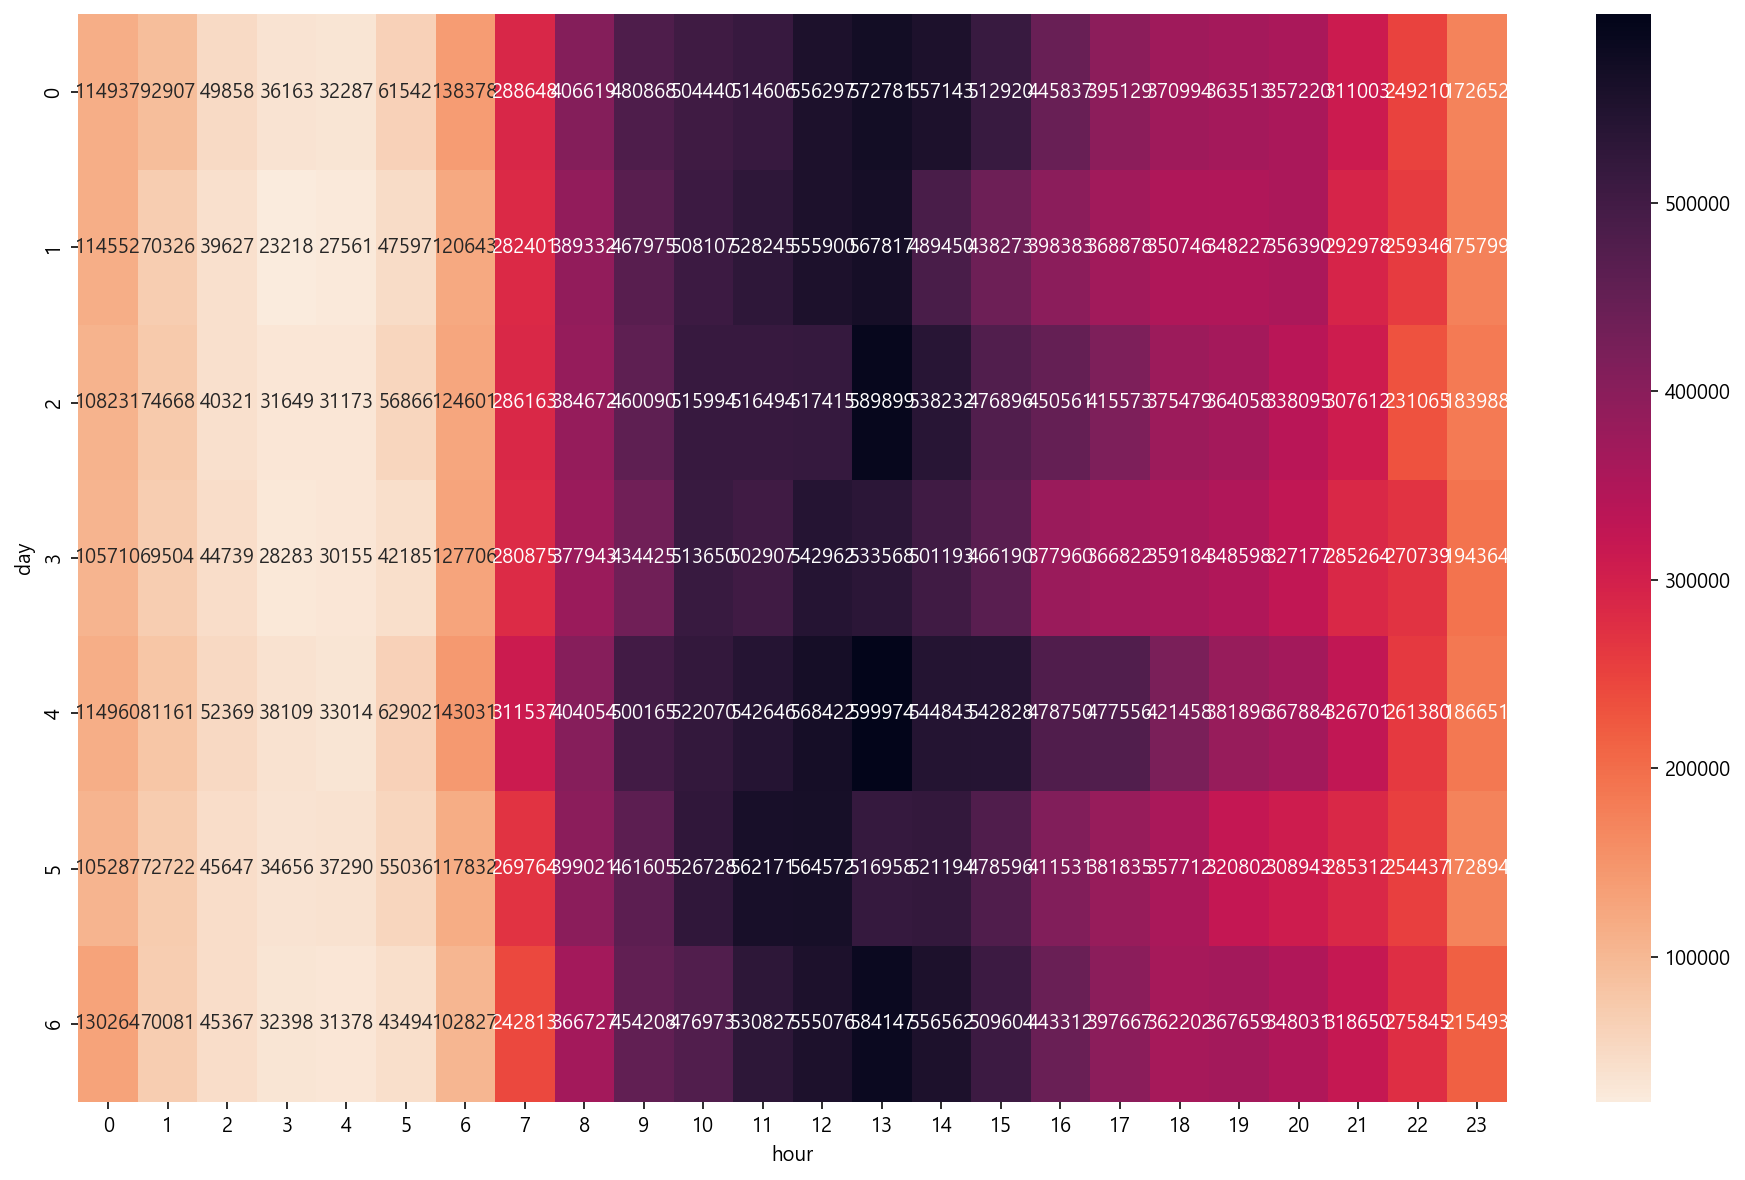

In [26]:
# 그래프 크기 설정
plt.figure(figsize=(16,10))

# 히트맵 그래프 그리기
sns.heatmap(df_pivot_week,annot = True, fmt='.0f',cmap='rocket_r')

# 그래프 표현
plt.show()

In [27]:
df_pivot_week = df_pur_week.pivot_table(values='price', index='day', columns='hour')
df_pivot_week=df_pivot_week.divide(df_pivot_week[0],axis=0)

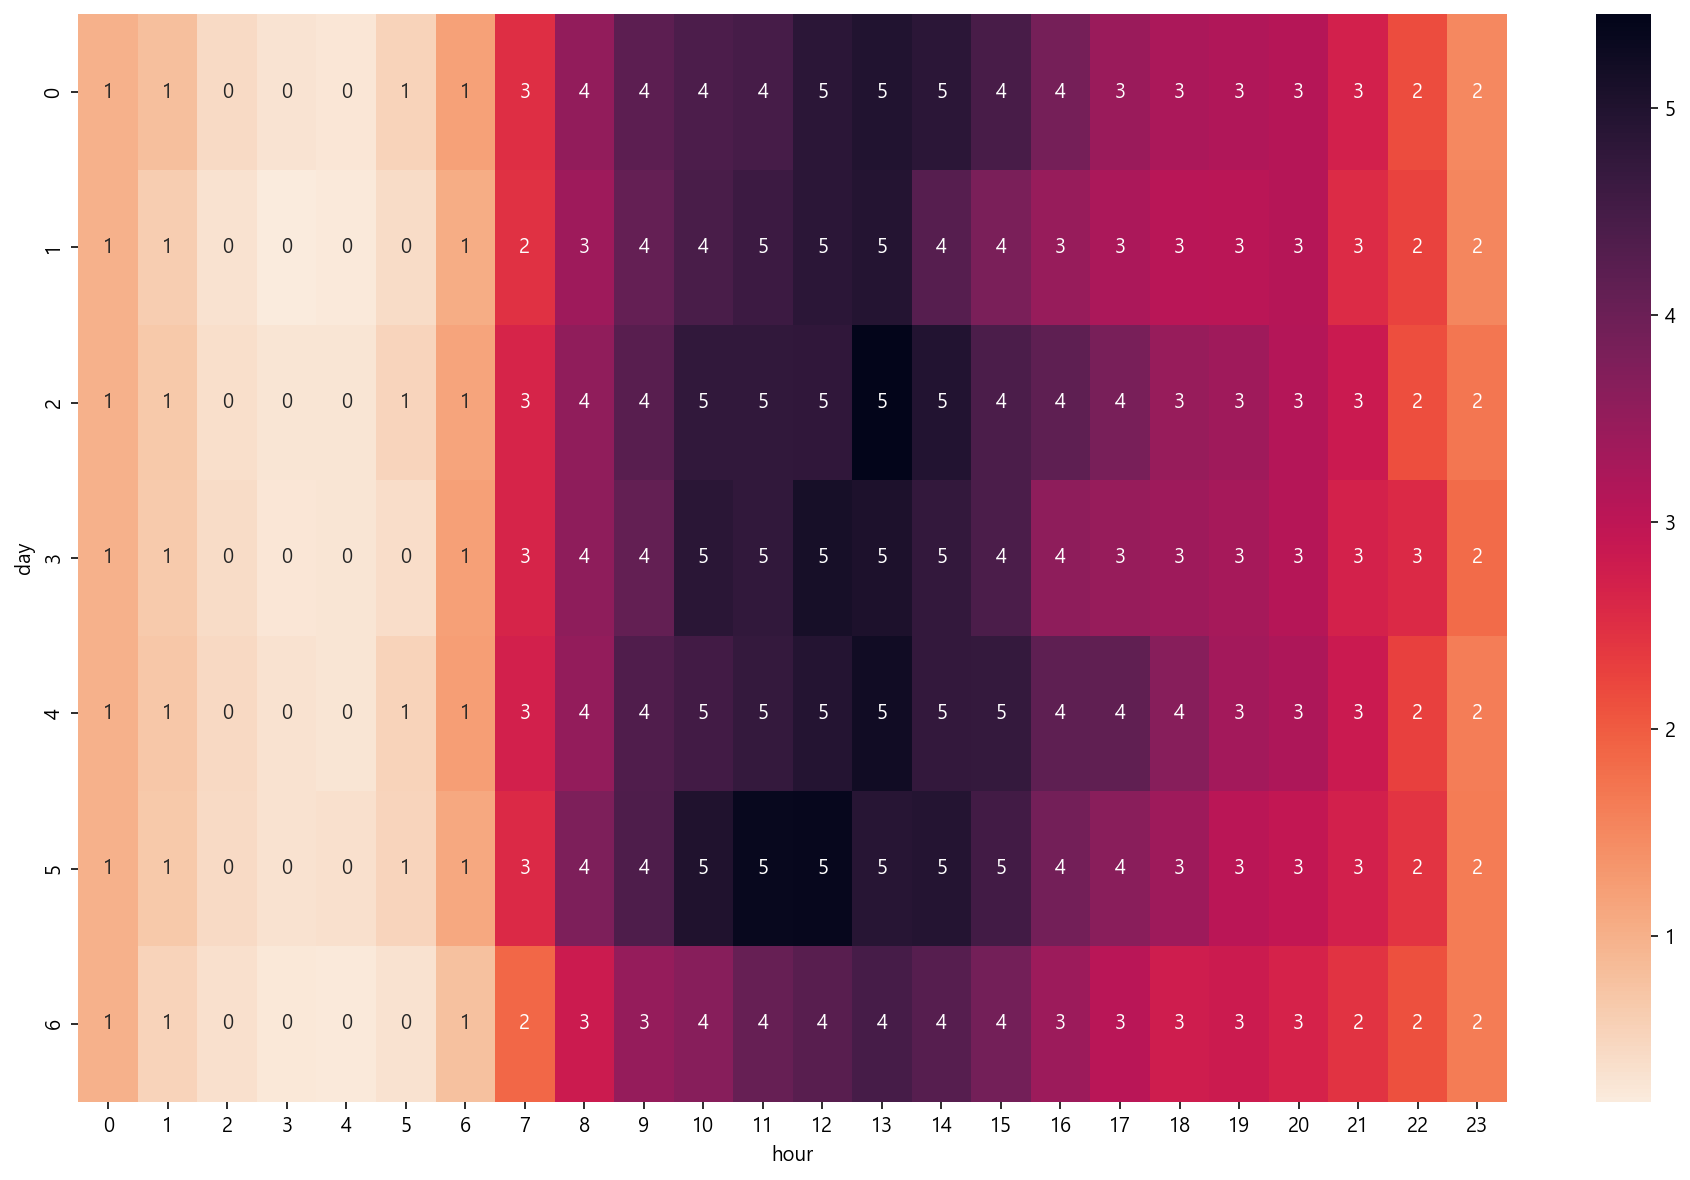

In [28]:
# 그래프 크기 설정
plt.figure(figsize=(16,10))

# 히트맵 그래프 그리기
sns.heatmap(df_pivot_week,annot = True, fmt='.0f',cmap='rocket_r')

# 그래프 표현
plt.show()

### 화요일을 타겟으로 어느 시간대에 view와 purchase가 가장 많을지 확인필요

In [31]:
df_tues = df_EDA.loc[df_EDA['day_name']=='Tuesday']

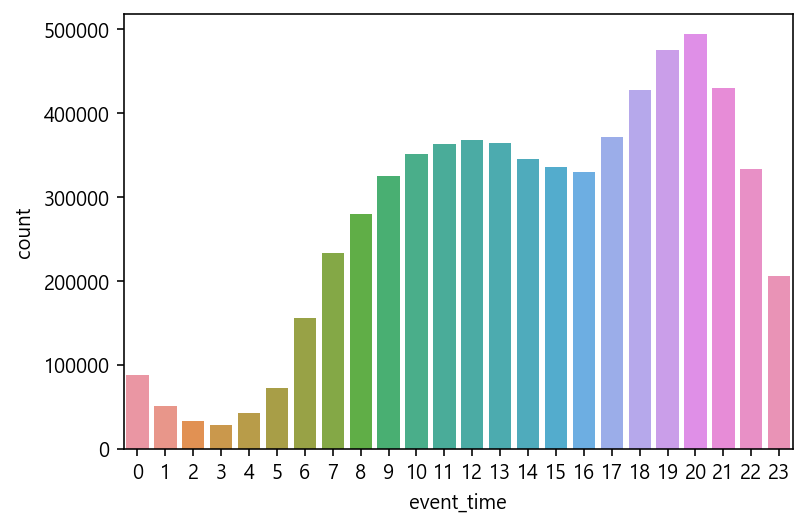

In [32]:
# view

sns.countplot(x=df_tues.loc[df_tues['event_type'] == 'view']['event_time'].dt.hour);

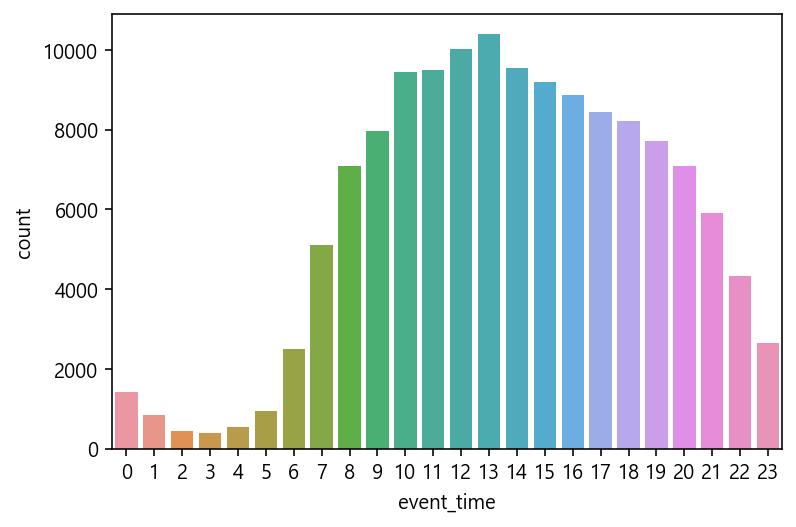

In [33]:
# cart

sns.countplot(x=df_tues.loc[df_tues['event_type'] == 'cart']['event_time'].dt.hour);

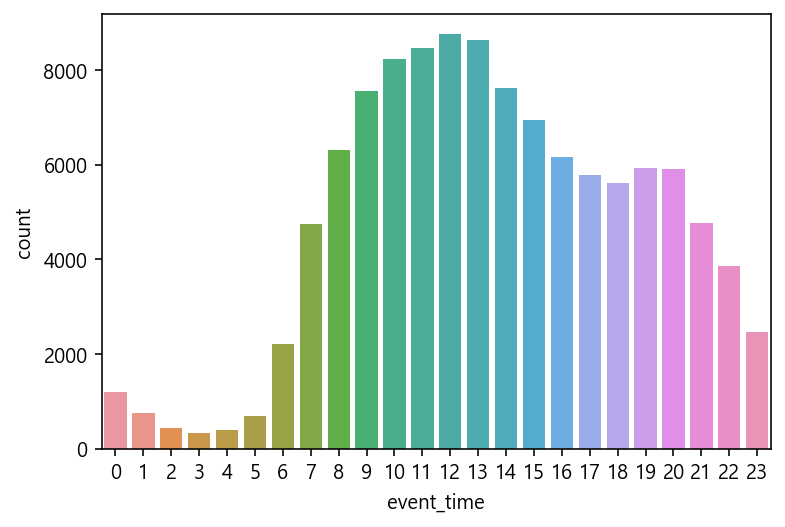

In [34]:
# purchase

sns.countplot(x=df_tues.loc[df_tues['event_type'] == 'purchase']['event_time'].dt.hour);

### 구매전환율 (CVR, Conversion Rate) 구하기

광고를 클릭하여 사이트에 들어온 방문자가 실제 구매 활동회원가입, 구매, 장바구니담기 등 광고주가 원하는 특정 행위을 하는 비율.

구매전환율 = 전환수(구매횟수)/클릭수*100

In [76]:
df_heat = df.copy()
df_heat['event_time'] =  df_heat['event_time'].dt.to_period('D')

df_view_cvr = df_heat.loc[df_heat['event_type']=='view']
df_view_cvr = df_view_cvr[['event_time','user_session','price']]

df_pur_cvr = df_heat.loc[df_heat['event_type']=='purchase']
df_pur_cvr = df_pur_cvr[['event_time','user_session','price']]


In [77]:
# view
df_date_view = df_view_cvr.groupby('event_time').count().reset_index()
# purchase
df_date_purchase = df_pur_cvr.groupby('event_time').count().reset_index()

# merge
df_cvr = pd.merge(df_date_view,df_date_purchase, on='event_time')

# merge
df_cvr = pd.merge(df_date_view,df_date_purchase, on='event_time')

# cvr 컬럼추가
df_cvr['CVR'] = df_cvr['user_session_y']/df_cvr['user_session_x'] *100

In [80]:
# 일별 매출
df_day_purchase = df_heat.loc[df_heat['event_type']=='purchase']
df_day_purchase['event_time'] =  df_day_purchase['event_time']

df_day_purchase = df_day_purchase[['event_time','price']]
df_day_purchase = df_day_purchase.groupby('event_time').sum().reset_index()

# merge

df_cvr = pd.merge(df_cvr,df_day_purchase, on='event_time')

df_cvr['weekday'] = df_cvr['event_time'].dt.weekday
df_cvr

,event_time,user_session_x,price_x,user_session_y,price_y,CVR,price,weekday
0,2019-10-01,1161414,1161414,18726,18726,1.612345,6067589.17,1
1,2019-10-02,1159861,1159861,19553,19553,1.685805,6245642.44,2
2,2019-10-03,1084787,1084787,19028,19028,1.754077,6141985.13,3
3,2019-10-04,1339366,1339366,26991,26991,2.015207,8625039.77,4
4,2019-10-05,1263361,1263361,23436,23436,1.855052,7325046.71,5
5,2019-10-06,1275006,1275006,22388,22388,1.755913,6797547.07,6
6,2019-10-07,1168794,1168794,21414,21414,1.832145,6360972.61,0
7,2019-10-08,1324643,1324643,23062,23062,1.740997,6815780.05,1
8,2019-10-09,1304298,1304298,22696,22696,1.740093,6825002.28,2
9,2019-10-10,1236912,1236912,21762,21762,1.759381,6600835.12,3


<AxesSubplot:xlabel='event_time'>

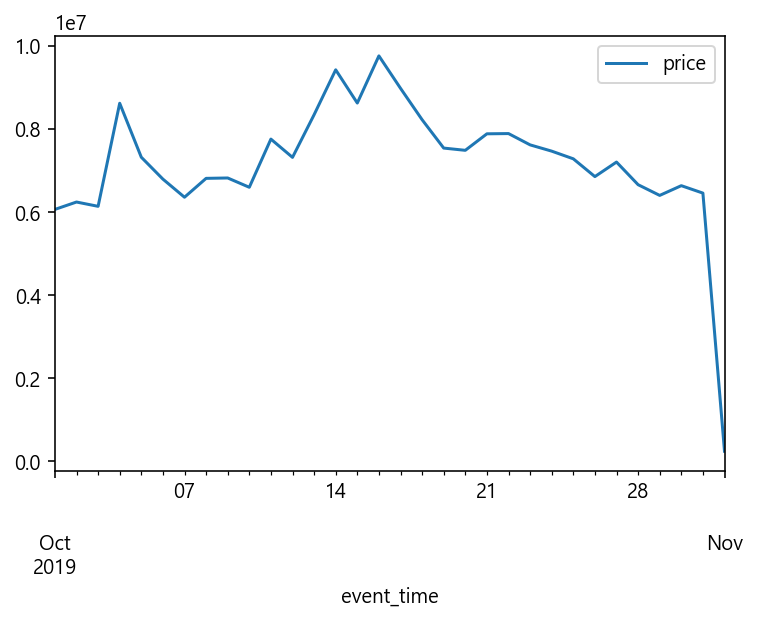

In [81]:
# 시계열 시각화

# 매출
df_cvr.plot(x='event_time', y='price')

<AxesSubplot:xlabel='event_time'>

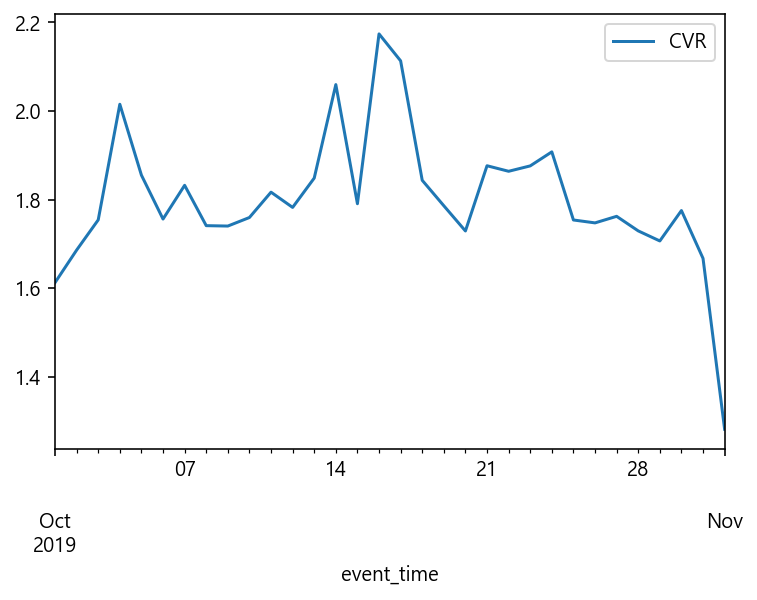

In [82]:
# CVR
df_cvr.plot(x='event_time', y='CVR')

# 브랜드 & 카테고리 상위 분석

In [4]:
# 브랜드 카운트

df['brand'].value_counts().head(10)

samsung     5282775
apple       4122554
xiaomi      3083763
no_brand    2819864
lucente     1541751
missing     1521087
huawei      1111205
lg           562404
bosch        557090
oppo         482887
Name: brand, dtype: int64

In [5]:
# 카테고리 카운트 top 10

df['category_code'].value_counts().head(10)

electronics.smartphone         11507231
no_cat                          3186832
auto.accessories.tire           1888744
accessories.jewelry             1676223
missing                         1521087
electronics.clocks              1311033
electronics.video.tv            1285034
computers.notebook              1137623
electronics.audio.headphone     1100188
appliances.kitchen.washer        963381
Name: category_code, dtype: int64

In [6]:
# 대분류 기준 top 10

df["category_code"].str.split(".").str[0].value_counts().head(10)

electronics     16853504
appliances       6150611
auto             3422424
no_cat           3186832
furniture        2365596
computers        2324217
accessories      1914461
apparel          1643737
missing          1521087
construction     1425387
Name: category_code, dtype: int64

In [7]:
# 중분류 기준 top 10

df["category_code"].str.split(".").str[1].value_counts().head(10)

smartphone     11640652
kitchen         4648890
accessories     3422424
jewelry         1676223
audio           1666325
environment     1447916
clocks          1311033
video           1298188
shoes           1208383
notebook        1137623
Name: category_code, dtype: int64

In [8]:
# 소분류 기준 top 10

df["category_code"].str.split(".").str[2].value_counts().head(10)

tire             1888744
tv               1285034
headphone        1100188
washer            963381
refrigerators     887755
vacuum            801670
kit               694553
player            470208
set               466987
cooker            457909
Name: category_code, dtype: int64

### view 기준

In [9]:
df_view = df.loc[df['event_type']=='view']
df_view['brand'].value_counts().head(10)

samsung     4806630
apple       3770597
xiaomi      2922650
no_brand    2782373
lucente     1518812
missing     1501024
huawei      1045572
bosch        544230
lg           540131
oppo         451449
Name: brand, dtype: int64

In [10]:
df_view['category_code'].value_counts().head(10)

electronics.smartphone         10619448
no_cat                          3135201
auto.accessories.tire           1823852
accessories.jewelry             1651840
missing                         1501024
electronics.clocks              1272783
electronics.video.tv            1218126
computers.notebook              1106406
electronics.audio.headphone     1018542
appliances.kitchen.washer        923362
Name: category_code, dtype: int64

### cart 기준

In [13]:
df_cart = df.loc[df['event_type']=='cart']
df_cart['brand'].value_counts().head(10)

samsung     303249
apple       209084
xiaomi      104497
huawei       42132
oppo         20547
lg           13546
no_brand     12000
sony         10060
acer          9400
elenberg      8598
Name: brand, dtype: int64

In [14]:
df_cart['category_code'].value_counts().head(10)

electronics.smartphone           549765
electronics.audio.headphone       51143
electronics.video.tv              41667
appliances.kitchen.washer         23137
no_cat                            22801
auto.accessories.tire             20873
electronics.clocks                20344
electronics.clock                 19951
appliances.environment.vacuum     17263
computers.notebook                15627
Name: category_code, dtype: int64

### purchase 기준

In [11]:
df_pur = df.loc[df['event_type']=='purchase']
df_pur['brand'].value_counts().head(10)

samsung     172896
apple       142873
xiaomi       56616
no_brand     25491
huawei       23501
lucente      22939
missing      14349
oppo         10891
cordiant     10551
lg            8727
Name: brand, dtype: int64

In [12]:
# 카테고리 카운트 top 10

df_pur['category_code'].value_counts().head(10)

electronics.smartphone         338018
auto.accessories.tire           44019
electronics.audio.headphone     30503
no_cat                          28830
electronics.video.tv            25241
accessories.jewelry             24383
electronics.clocks              17906
appliances.kitchen.washer       16882
computers.notebook              15590
missing                         14349
Name: category_code, dtype: int64

### top10 조사 결과

### brand

**view** - samsung, apple, xiaomi, no_brand, lucente\
**cart** - samsung, apple, xiaomi, huawei, oppo\
**purchase** - samsung, apple, xiaomi, no_brand, huawei

### category

**view**
- electronics.smartphone
- no_cat
- auto.accessories.tire
- accessories.jewelry
- missing
  
**cart**
- electronics.smartphone
- electronics.audio.headphone
- electronics.video.tv
- appliances.kitchen.washer
- no_cat
  
**purchase**
- electronics.smartphone
- auto.accessories.tire
- electronics.audio.headphone
- no_cat
- electronics.video.tv

view가 많다고해서 구매까지 이뤄지지 않는 모습을 보여주고 있음.

In [17]:
df_pur_smart = df.loc[(df['event_type']=='purchase')&(df['category_code']=='electronics.smartphone')]

# smartphone 평균 구매가격 조회
print(df_pur_smart['price'].mean())

464.61911309456883


In [18]:
df_pur_tire = df.loc[(df['event_type']=='purchase')&(df['category_code']=='auto.accessories.tire')]

# tire 평균 구매가격 조회
print(df_pur_tire['price'].mean())

66.45403734750903


In [19]:
df_pur_head = df.loc[(df['event_type']=='purchase')&(df['category_code']=='electronics.audio.headphone')]

# headphone 평균 구매가격 조회
print(df_pur_head['price'].mean())

116.02553814378915


# 코호트 분석

사용자의 구매 유지율 파악

In [4]:
# 분석에 필요한 컬럼만 남김.

df_co = df.loc[df['event_type']=='purchase']
df_co = df_co[['event_time','product_id','user_id']].reset_index(drop=True)

df_co

,event_time,product_id,user_id
0,2019-10-01 04:02:14+04:00,1004856,543272936
1,2019-10-01 04:04:37+04:00,1002532,551377651
2,2019-10-01 04:06:02+04:00,5100816,514591159
3,2019-10-01 04:07:07+04:00,13800054,555332717
4,2019-10-01 04:09:26+04:00,4804055,524601178
...,...,...,...
742844,2019-11-01 03:55:13+04:00,26402784,516604399
742845,2019-11-01 03:55:21+04:00,47500017,514622109
742846,2019-11-01 03:56:03+04:00,1003306,512717356
742847,2019-11-01 03:56:53+04:00,1004240,533892594


### 주문일자 컬럼으로 일단위 기간 만들기

In [5]:
df_co['event_time'] = df_co['event_time'].dt.strftime("%Y-%m-%d")
df_co['OrderPeriod'] = df_co['event_time']

df_co

,event_time,product_id,user_id,OrderPeriod
0,2019-10-01,1004856,543272936,2019-10-01
1,2019-10-01,1002532,551377651,2019-10-01
2,2019-10-01,5100816,514591159,2019-10-01
3,2019-10-01,13800054,555332717,2019-10-01
4,2019-10-01,4804055,524601178,2019-10-01
...,...,...,...,...
742844,2019-11-01,26402784,516604399,2019-11-01
742845,2019-11-01,47500017,514622109,2019-11-01
742846,2019-11-01,1003306,512717356,2019-11-01
742847,2019-11-01,1004240,533892594,2019-11-01


### 유저의 첫번째 주문을 토대로 유저별 코호트 그룹 설정하기

In [6]:
df_co.set_index('user_id',inplace=True)
df_co

,event_time,product_id,OrderPeriod
user_id,,,
543272936,2019-10-01,1004856,2019-10-01
551377651,2019-10-01,1002532,2019-10-01
514591159,2019-10-01,5100816,2019-10-01
555332717,2019-10-01,13800054,2019-10-01
524601178,2019-10-01,4804055,2019-10-01
...,...,...,...
516604399,2019-11-01,26402784,2019-11-01
514622109,2019-11-01,47500017,2019-11-01
512717356,2019-11-01,1003306,2019-11-01


In [7]:
# user_id별 첫 주문일자

FirstOrder=df_co.groupby(df_co.index)['event_time'].min()
FirstOrder.head()

user_id
264649825    2019-10-06
303160429    2019-10-13
340041246    2019-10-03
371877401    2019-10-09
384989212    2019-10-18
Name: event_time, dtype: object

In [8]:
df_co['FirstOrder']=FirstOrder
df_co.reset_index(inplace=True)
df_co.head()

,user_id,event_time,product_id,OrderPeriod,FirstOrder
0,543272936,2019-10-01,1004856,2019-10-01,2019-10-01
1,551377651,2019-10-01,1002532,2019-10-01,2019-10-01
2,514591159,2019-10-01,5100816,2019-10-01,2019-10-01
3,555332717,2019-10-01,13800054,2019-10-01,2019-10-01
4,524601178,2019-10-01,4804055,2019-10-01,2019-10-01


코호트 그룹과 주문기간으로 데이터 집계하기

In [24]:
grouped = df_co.groupby(['FirstOrder', 'OrderPeriod'])

In [25]:
# grouped 객체에 고객아이디(UserId)를 집계하며, 집계함수로 각 unique값의 개수를 세는 nunqiue함수를 사용
# 고객이 여러번 방문했다 하더라도 한 번으로 집계하게 되어 일별 순방문자수를 파악할 수 있습니다.

cohorts=grouped['user_id'].nunique()
cohorts.head()

FirstOrder  OrderPeriod
2019-10-01  2019-10-01     13704
            2019-10-02      1520
            2019-10-03      1217
            2019-10-04      1315
            2019-10-05      1036
Name: user_id, dtype: int64

In [26]:
# 순방문자수를 집계한 데이터로 구성

cohorts=cohorts.reset_index()
cohorts

,FirstOrder,OrderPeriod,user_id
0,2019-10-01,2019-10-01,13704
1,2019-10-01,2019-10-02,1520
2,2019-10-01,2019-10-03,1217
3,2019-10-01,2019-10-04,1315
4,2019-10-01,2019-10-05,1036
...,...,...,...
523,2019-10-30,2019-10-31,492
524,2019-10-30,2019-11-01,14
525,2019-10-31,2019-10-31,7877
526,2019-10-31,2019-11-01,15


In [27]:
cohorts.rename({'user_id':'TotalUsers'},axis=1,inplace=True)
cohorts.head()

,FirstOrder,OrderPeriod,TotalUsers
0,2019-10-01,2019-10-01,13704
1,2019-10-01,2019-10-02,1520
2,2019-10-01,2019-10-03,1217
3,2019-10-01,2019-10-04,1315
4,2019-10-01,2019-10-05,1036


In [28]:
each_period=cohorts['FirstOrder'].value_counts().sort_index()
each_period

2019-10-01    32
2019-10-02    31
2019-10-03    30
2019-10-04    29
2019-10-05    28
2019-10-06    27
2019-10-07    26
2019-10-08    25
2019-10-09    24
2019-10-10    23
2019-10-11    22
2019-10-12    21
2019-10-13    20
2019-10-14    19
2019-10-15    18
2019-10-16    17
2019-10-17    16
2019-10-18    15
2019-10-19    14
2019-10-20    13
2019-10-21    12
2019-10-22    11
2019-10-23    10
2019-10-24     9
2019-10-25     8
2019-10-26     7
2019-10-27     6
2019-10-28     5
2019-10-29     4
2019-10-30     3
2019-10-31     2
2019-11-01     1
Name: FirstOrder, dtype: int64

In [29]:


cohortperiod=[]

for x in each_period: 
    for y in range(x):
        cohortperiod.append(y)

In [30]:
cohorts['CohortPeriod']=cohortperiod
cohorts.head(20)

,FirstOrder,OrderPeriod,TotalUsers,CohortPeriod
0,2019-10-01,2019-10-01,13704,0
1,2019-10-01,2019-10-02,1520,1
2,2019-10-01,2019-10-03,1217,2
3,2019-10-01,2019-10-04,1315,3
4,2019-10-01,2019-10-05,1036,4
5,2019-10-01,2019-10-06,937,5
6,2019-10-01,2019-10-07,941,6
7,2019-10-01,2019-10-08,921,7
8,2019-10-01,2019-10-09,857,8
9,2019-10-01,2019-10-10,828,9


In [31]:
cohorts.set_index(['FirstOrder','CohortPeriod'],inplace=True)
cohorts.head()

OrderPeriod  TotalUsers
FirstOrder CohortPeriod                        
2019-10-01 0             2019-10-01       13704
           1             2019-10-02        1520
           2             2019-10-03        1217
           3             2019-10-04        1315
           4             2019-10-05        1036

In [33]:
# unstack(1)을 사용하여 y축은 코호트, x축은 기간으로 표현되는 코호트 분석의 형태로 변환

cohorts=cohorts['TotalUsers'].unstack(1)
cohorts

CohortPeriod,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
FirstOrder,,,,,,,,,,,,,,,,,,,,,
2019-10-01,13704.0,1520.0,1217.0,1315.0,1036.0,937.0,941.0,921.0,857.0,828.0,...,618.0,620.0,613.0,510.0,503.0,528.0,482.0,484.0,520.0,22.0
2019-10-02,12403.0,1096.0,1061.0,787.0,689.0,687.0,654.0,654.0,610.0,665.0,...,392.0,394.0,367.0,395.0,349.0,388.0,363.0,340.0,18.0,NaN
2019-10-03,11280.0,1096.0,676.0,610.0,573.0,566.0,549.0,541.0,530.0,465.0,...,361.0,308.0,315.0,300.0,280.0,293.0,312.0,18.0,NaN,NaN
2019-10-04,15682.0,1203.0,788.0,742.0,734.0,599.0,580.0,662.0,622.0,612.0,...,387.0,383.0,347.0,318.0,348.0,304.0,18.0,NaN,NaN,NaN
2019-10-05,13044.0,893.0,545.0,544.0,507.0,414.0,508.0,433.0,505.0,492.0,...,285.0,241.0,253.0,257.0,218.0,10.0,NaN,NaN,NaN,NaN
2019-10-06,12281.0,749.0,521.0,436.0,418.0,425.0,398.0,484.0,432.0,415.0,...,233.0,222.0,188.0,201.0,11.0,NaN,NaN,NaN,NaN,NaN
2019-10-07,11134.0,809.0,551.0,452.0,439.0,398.0,385.0,437.0,416.0,387.0,...,199.0,188.0,213.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-08,11841.0,847.0,526.0,509.0,435.0,463.0,468.0,415.0,474.0,383.0,...,224.0,230.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-09,11371.0,744.0,574.0,456.0,451.0,458.0,387.0,415.0,347.0,316.0,...,212.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
cohorts[0]

FirstOrder
2019-10-01    13704.0
2019-10-02    12403.0
2019-10-03    11280.0
2019-10-04    15682.0
2019-10-05    13044.0
2019-10-06    12281.0
2019-10-07    11134.0
2019-10-08    11841.0
2019-10-09    11371.0
2019-10-10    10718.0
2019-10-11    12819.0
2019-10-12    12631.0
2019-10-13    14703.0
2019-10-14    11956.0
2019-10-15    11148.0
2019-10-16    13851.0
2019-10-17    11560.0
2019-10-18    10824.0
2019-10-19    10650.0
2019-10-20    11078.0
2019-10-21    10607.0
2019-10-22    10586.0
2019-10-23    10173.0
2019-10-24     9757.0
2019-10-25     9628.0
2019-10-26     9409.0
2019-10-27     9703.0
2019-10-28     8314.0
2019-10-29     8008.0
2019-10-30     8174.0
2019-10-31     7877.0
2019-11-01      204.0
Name: 0, dtype: float64

In [35]:
# 비율화

user_retention=cohorts.divide(cohorts[0],axis=0)
user_retention

CohortPeriod,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
FirstOrder,,,,,,,,,,,,,,,,,,,,,
2019-10-01,1.0,0.110917,0.088806,0.095957,0.075598,0.068374,0.068666,0.067207,0.062536,0.060420,...,0.045096,0.045242,0.044731,0.037215,0.036705,0.038529,0.035172,0.035318,0.037945,0.001605
2019-10-02,1.0,0.088366,0.085544,0.063452,0.055551,0.055390,0.052729,0.052729,0.049182,0.053616,...,0.031605,0.031767,0.029590,0.031847,0.028138,0.031283,0.029267,0.027413,0.001451,NaN
2019-10-03,1.0,0.097163,0.059929,0.054078,0.050798,0.050177,0.048670,0.047961,0.046986,0.041223,...,0.032004,0.027305,0.027926,0.026596,0.024823,0.025975,0.027660,0.001596,NaN,NaN
2019-10-04,1.0,0.076712,0.050249,0.047315,0.046805,0.038197,0.036985,0.042214,0.039663,0.039026,...,0.024678,0.024423,0.022127,0.020278,0.022191,0.019385,0.001148,NaN,NaN,NaN
2019-10-05,1.0,0.068461,0.041782,0.041705,0.038868,0.031739,0.038945,0.033195,0.038715,0.037718,...,0.021849,0.018476,0.019396,0.019703,0.016713,0.000767,NaN,NaN,NaN,NaN
2019-10-06,1.0,0.060989,0.042423,0.035502,0.034036,0.034606,0.032408,0.039410,0.035176,0.033792,...,0.018972,0.018077,0.015308,0.016367,0.000896,NaN,NaN,NaN,NaN,NaN
2019-10-07,1.0,0.072660,0.049488,0.040596,0.039429,0.035746,0.034579,0.039249,0.037363,0.034758,...,0.017873,0.016885,0.019131,0.000449,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-08,1.0,0.071531,0.044422,0.042986,0.036737,0.039101,0.039524,0.035048,0.040030,0.032345,...,0.018917,0.019424,0.000591,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-09,1.0,0.065430,0.050479,0.040102,0.039662,0.040278,0.034034,0.036496,0.030516,0.027790,...,0.018644,0.000879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


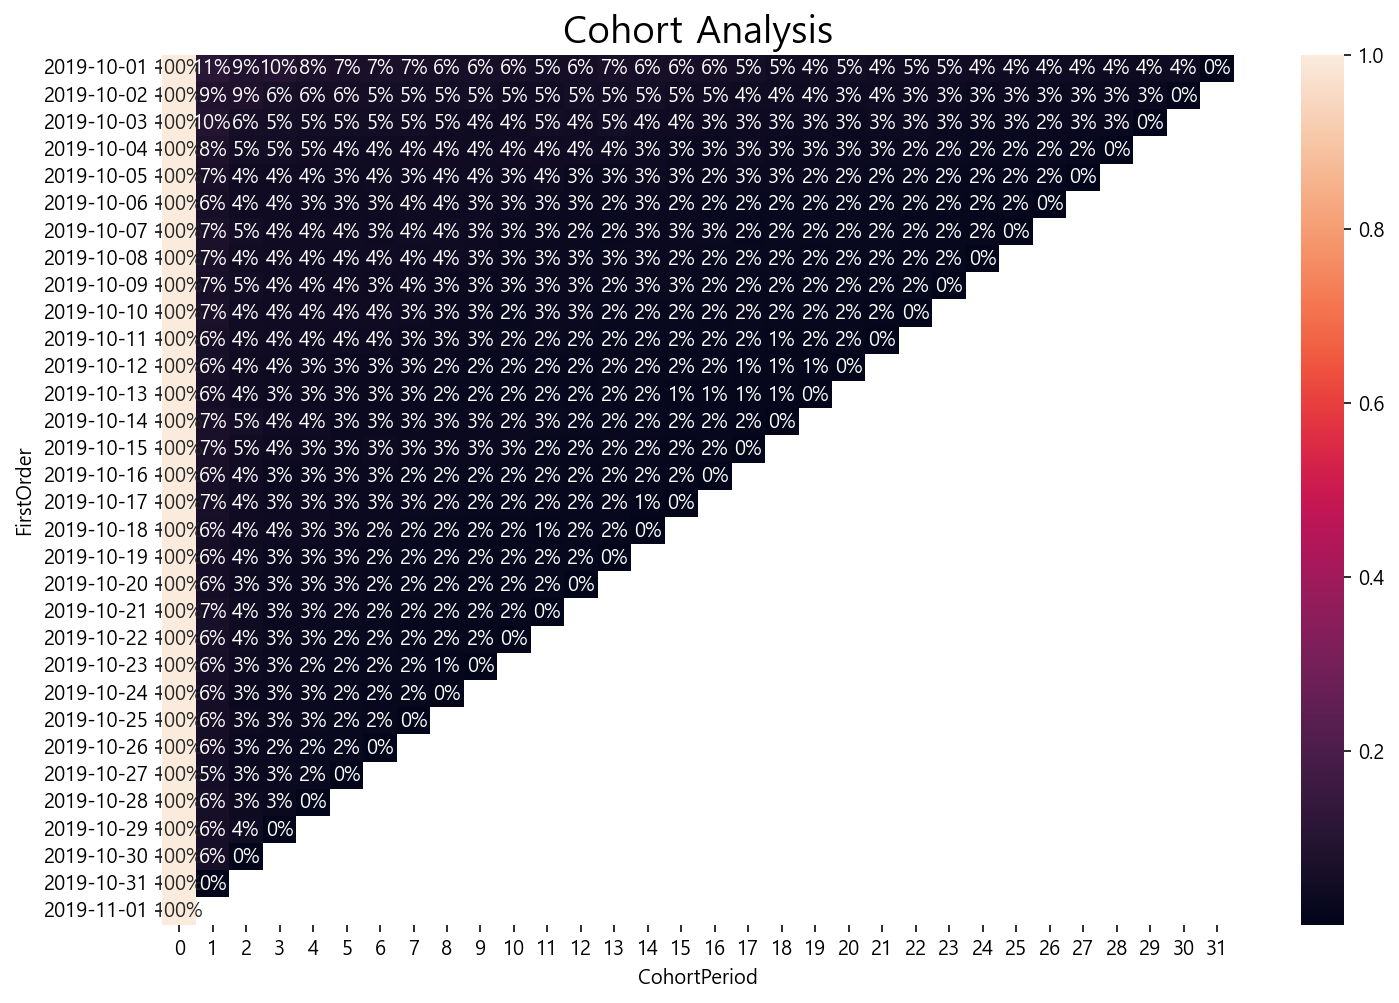

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.figure(figsize=(12, 8))
plt.title('Cohort Analysis', fontsize=19)
sns.heatmap(user_retention, annot=True, fmt='.0%')
plt.show()

### 주간 코호트 분석 진행

In [37]:
df_co_week = df.loc[df['event_type']=='purchase']
df_co_week = df_co_week[['event_time','product_id','user_id']].reset_index(drop=True)

df_co_week['event_time'] = df_co_week['event_time'].dt.week-39
df_co_week['OrderPeriod'] = df_co_week['event_time']

In [38]:
df_co_week.set_index('user_id',inplace=True)
df_co_week

,event_time,product_id,OrderPeriod
user_id,,,
543272936,1,1004856,1
551377651,1,1002532,1
514591159,1,5100816,1
555332717,1,13800054,1
524601178,1,4804055,1
...,...,...,...
516604399,5,26402784,5
514622109,5,47500017,5
512717356,5,1003306,5


In [39]:
# user_id별 첫 주문일자

FirstOrder=df_co_week.groupby(df_co_week.index)['event_time'].min()
FirstOrder.head()

user_id
264649825    1
303160429    2
340041246    1
371877401    2
384989212    3
Name: event_time, dtype: int64

In [40]:
df_co_week['FirstOrder']=FirstOrder
df_co_week.reset_index(inplace=True)
df_co_week.head()

,user_id,event_time,product_id,OrderPeriod,FirstOrder
0,543272936,1,1004856,1,1
1,551377651,1,1002532,1,1
2,514591159,1,5100816,1,1
3,555332717,1,13800054,1,1
4,524601178,1,4804055,1,1


In [41]:
grouped_week = df_co_week.groupby(['FirstOrder', 'OrderPeriod'])

cohorts_week=grouped_week['user_id'].nunique()
cohorts_week.head()

FirstOrder  OrderPeriod
1           1              78394
            2              15876
            3              13717
            4              10639
            5               5901
Name: user_id, dtype: int64

In [42]:
cohorts_week=cohorts_week.reset_index()
cohorts_week

,FirstOrder,OrderPeriod,user_id
0,1,1,78394
1,1,2,15876
2,1,3,13717
3,1,4,10639
4,1,5,5901
5,2,2,85217
6,2,3,13719
7,2,4,9454
8,2,5,4808
9,3,3,81067


In [43]:
cohorts_week.rename({'user_id':'TotalUsers'},axis=1,inplace=True)
cohorts_week.head()

,FirstOrder,OrderPeriod,TotalUsers
0,1,1,78394
1,1,2,15876
2,1,3,13717
3,1,4,10639
4,1,5,5901


In [44]:
each_period_week=cohorts_week['FirstOrder'].value_counts().sort_index()
each_period_week

1    5
2    4
3    3
4    2
5    1
Name: FirstOrder, dtype: int64

In [45]:
cohortperiod_week=[]

for x in each_period_week: 
    for y in range(x):
        cohortperiod_week.append(y)

In [46]:
cohorts_week['CohortPeriod']=cohortperiod_week
cohorts_week.head(20)

,FirstOrder,OrderPeriod,TotalUsers,CohortPeriod
0,1,1,78394,0
1,1,2,15876,1
2,1,3,13717,2
3,1,4,10639,3
4,1,5,5901,4
5,2,2,85217,0
6,2,3,13719,1
7,2,4,9454,2
8,2,5,4808,3
9,3,3,81067,0


In [47]:
cohorts_week.set_index(['FirstOrder','CohortPeriod'],inplace=True)
cohorts_week.head()

OrderPeriod  TotalUsers
FirstOrder CohortPeriod                         
1          0                       1       78394
           1                       2       15876
           2                       3       13717
           3                       4       10639
           4                       5        5901

In [48]:
cohorts_week=cohorts_week['TotalUsers'].unstack(1)
cohorts_week

CohortPeriod,0,1,2,3,4
FirstOrder,,,,,
1,78394.0,15876.0,13717.0,10639.0,5901.0
2,85217.0,13719.0,9454.0,4808.0,NaN
3,81067.0,10910.0,4662.0,NaN,NaN
4,69863.0,5269.0,NaN,NaN,NaN
5,32577.0,NaN,NaN,NaN,NaN


In [49]:
cohorts_week[0]

FirstOrder
1    78394.0
2    85217.0
3    81067.0
4    69863.0
5    32577.0
Name: 0, dtype: float64

In [50]:
user_retention_week=cohorts_week.divide(cohorts_week[0],axis=0)
user_retention_week

CohortPeriod,0,1,2,3,4
FirstOrder,,,,,
1,1.0,0.202515,0.174975,0.135712,0.075274
2,1.0,0.160989,0.110940,0.056421,NaN
3,1.0,0.134580,0.057508,NaN,NaN
4,1.0,0.075419,NaN,NaN,NaN
5,1.0,NaN,NaN,NaN,NaN


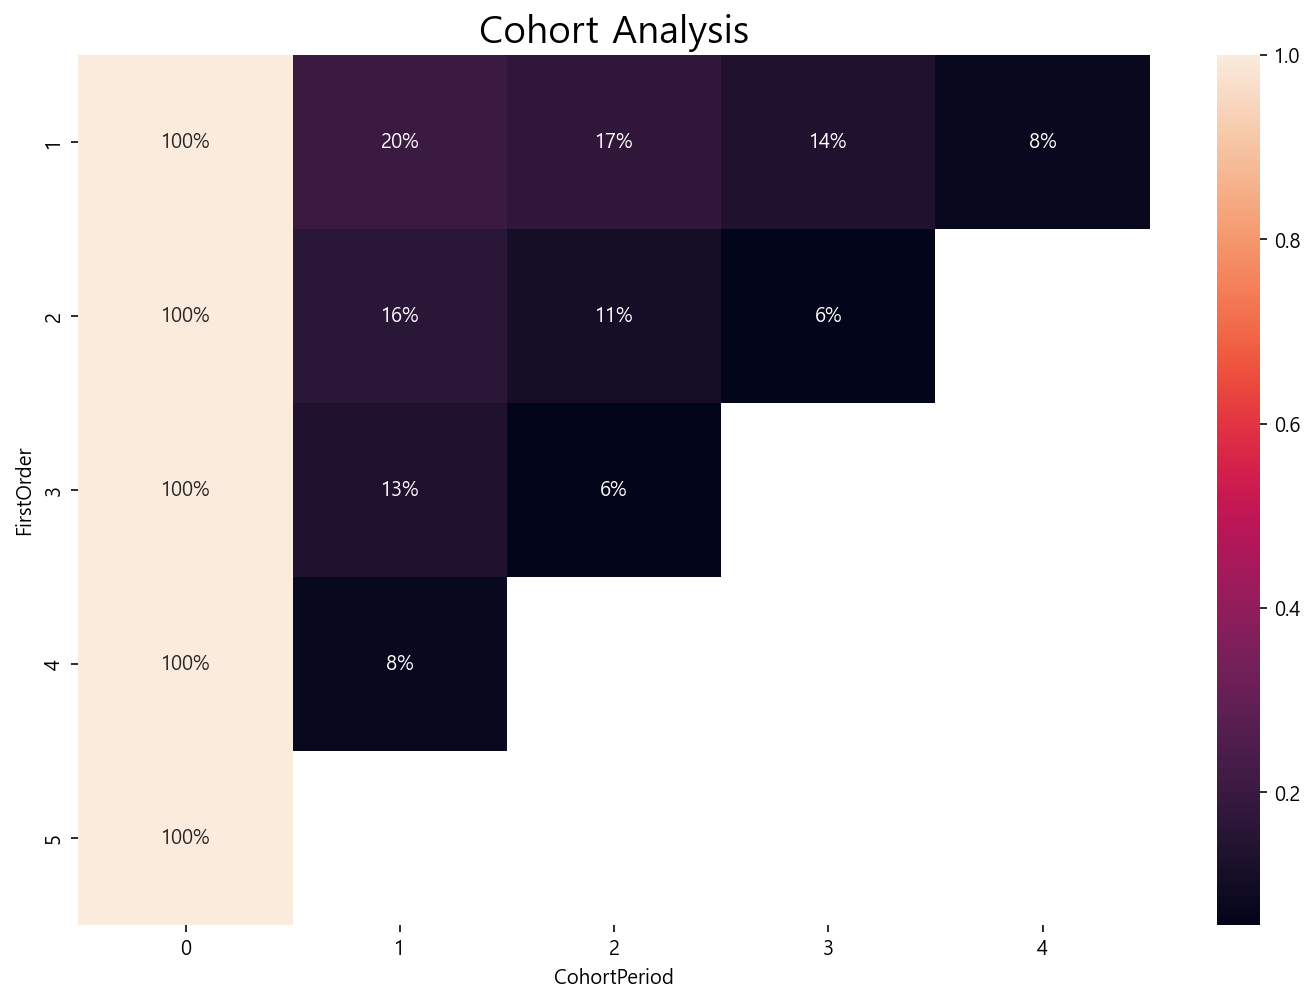

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.figure(figsize=(12, 8))
plt.title('Cohort Analysis', fontsize=19)
sns.heatmap(user_retention_week, annot=True, fmt='.0%')
plt.show()

# 퍼널 분석

**퍼널 스텝 DataFrame 생성**

퍼널이란?
- 사용자가 서비스 접속 후 상품을 구매하기까지의 경로를 가시화하여 전환과 이탈률을 측정함으로써 집중 개선 대상 페이지를 발견할 수 있는 기능

총 3 스텝(view - cart - purchase)로 나눴습니다.

In [53]:
funnel_dict = {'view':1,'cart':2,'purchase':3}
funnel_steps = pd.DataFrame.from_dict(funnel_dict, orient='index', columns=['steps_no'])
funnel_steps

,steps_no
view,1
cart,2
purchase,3


**user_session과 event_type로 grouping**

유저 ID가 아니라 session을 기준으로 하는 이유는 동일한 유저가 다른 세션으로 접속하는 경우가 있기 때문에 그럴 경우에는 별도 건으로 간주해야 함.\
유저세션과 이벤트 타입으로 그루핑 하여 가장 시간대가 빠른 해당 이벤트에 대해 추출하도록 한다.

In [54]:
grouped_funn = df.groupby(['user_session','event_type'])['event_time'].agg(np.min)

In [55]:
grouped_funn = pd.DataFrame(grouped_funn).merge(funnel_steps, left_on='event_type', right_index=True)
grouped_funn

,,event_time,steps_no
user_session,event_type,,
00000042-3e3f-42f9-810d-f3d264139c50,view,2019-10-18 14:54:45+04:00,1
00000056-a206-40dd-b174-a072550fa38c,view,2019-10-31 10:23:12+04:00,1
00000083-8816-4d58-a9b8-f52f54186edc,view,2019-10-06 15:24:45+04:00,1
000001fd-1f89-45e8-a3ce-fe3218cabfad,view,2019-10-25 12:30:42+04:00,1
000003eb-b63e-45d9-9f26-f229057c654a,view,2019-10-03 15:28:52+04:00,1
...,...,...,...
ffff15c0-016a-4ad9-8a32-982fab93ae39,purchase,2019-10-29 09:17:24+04:00,3
ffff2140-07d9-4f3f-9cdc-9a30ec5aaf33,purchase,2019-10-04 13:01:28+04:00,3
ffff2e30-9d65-450b-807e-fcd1c1799da1,purchase,2019-10-14 13:19:57+04:00,3


**퍼널 테이블 생성**

각 퍼널 스텝이 순서대로 column으로 오도록 변경함

In [56]:
funnel = grouped_funn.reset_index().pivot(index='user_session', columns='event_type', values='event_time')
funnel.head()

event_type,cart,purchase,view
user_session,,,
00000042-3e3f-42f9-810d-f3d264139c50,NaT,NaT,2019-10-18 14:54:45+04:00
00000056-a206-40dd-b174-a072550fa38c,NaT,NaT,2019-10-31 10:23:12+04:00
00000083-8816-4d58-a9b8-f52f54186edc,2019-10-06 15:33:54+04:00,2019-10-06 15:34:30+04:00,2019-10-06 15:24:45+04:00
000001fd-1f89-45e8-a3ce-fe3218cabfad,2019-10-25 12:34:23+04:00,2019-10-25 12:39:11+04:00,2019-10-25 12:30:42+04:00
000003eb-b63e-45d9-9f26-f229057c654a,NaT,NaT,2019-10-03 15:28:52+04:00


**퍼널 카운트 계산**

- 각 퍼널 스텝별 카운트

In [57]:
step_values = [funnel[index].notnull().sum() for index in funnel_steps.index]
step_values

# view      - 9,242,653
# cart      - 573,098
# purchase  - 629,560

[9242653, 573098, 629560]

In [59]:
def show_funnel(funnel_values, funnel_steps):
    from plotly import graph_objects as go
    
    fig = go.Figure(go.Funnel(
        y = funnel_steps,
        x = funnel_values
    ))
    fig.show()
show_funnel(step_values, funnel_steps.index)

**각 퍼널별 평균 소요 시간 계산**

In [112]:
# view -> cart

np.mean(funnel['cart'] - funnel['view'])

Timedelta('0 days 00:05:15.072387516')

In [113]:
# cart -> purchase

np.mean(funnel['purchase'] - funnel['cart'])

Timedelta('0 days 00:02:45.771158188')

In [114]:
# view -> purchase

np.mean(funnel['purchase'] - funnel['view'])

Timedelta('0 days 00:06:58.451795278')

view - cart 까지 걸리는 시간 : 평균 5분\
cart - purchase 까지 걸리는 시간 : 평균 3분\
view - purchase 까지 걸리는 시간 : 평균 7분